(sviluppo-strumento-notebook)=
# Costruzione di test psicometrici 

In [1]:
source("_common.R")

La maggior parte degli psicologi che utilizzano i test non creano test ad hoc ma piuttosto utilizzano test già validati e interpretano i punteggi sulla base delle norme fornite nel manuale del test. Quando si sceglie il test più appropriato per il problema da affrontare, è necessario considerare diverse domande. Ad esempio, qual è il valore minimo di attendibilità richiesto? In altre parole, a che livello di precisione è necessario essere in grado di differenziare tra i rispondenti? Che tipo di validità è importante? Quali sono le caratteristiche della popolazione che il gruppo normativo deve rappresentare? Qual è il livello di istruzione richiesto per completare il test? Quanto tempo è disponibile per la somministrazione del test e per lo scoring dei risultati? Quali sono i costi necessari per la somministrazione del test e per lo scoring dei risultati?

Dopo aver risposto a queste domande, la selezione del test si riduce solitamente ad una scelta tra poche alternative. Per prendere una decisione tra queste alternative, è importante consultare la letteratura specialistica che discute le proprietà psicometriche dei test e la loro validità. In questo modo, si può effettuare una scelta informata basata sulla conoscenza delle proprietà del test e sulla sua validità, e assicurarsi che sia adatto alla popolazione e alle esigenze specifiche del caso in questione.

Ogni psicologo ha l'obbligo di dimostrare che il test che sceglie per un determinato scopo sia il miglior strumento tra quelli disponibili per giungere ad una decisione razionale e obiettiva relativamente al problema che si trova ad affrontare (come indicato dal Codice Deontologico). Se nessuno dei test disponibili risulta appropriato per misurare un tratto psicologico specifico, si procede alla costruzione di un nuovo reattivo. La costruzione di un test richiede conoscenze specialistiche sia di tipo psicometrico che del fenomeno considerato.

Le fasi di costruzione dei test includono la definizione delle aree di contenuto che il test dovrà misurare; la generazione di un numero di item per ciascuna area circa tre volte superiore rispetto a quelli che si prevede faranno parte della versione finale del test; la somministrazione degli item ad un campione sufficientemente ampio (con centinaia di rispondenti selezionati in modo tale che il campione sia rappresentativo della popolazione di interesse); l'analisi degli item per selezionare quelli migliori; infine, la somministrazione della versione revisionata del test ad un nuovo campione per verificare se la versione finale del test sia soddisfacente dal punto di vista psicometrico. In caso affermativo, il campione esaminato fornisce le norme del test, e questa fase è chiamata "standardizzazione del test".

Per illustrare le fasi cruciali nella costruzione di un test psicometrico, utilizzeremo un caso pratico basato su dati reali, seguendo le linee guida proposte da {cite:t}`dima2018scale`. In questo esempio, prescindiamo dalla fase di creazione degli item, assumendo che siano già stati sviluppati da esperti, e in numero superiore a quello richiesto per la scala finale.

Ci focalizzeremo sulla procedura di selezione degli item. Per il nostro caso, consideriamo item sviluppati dagli psicologi dell'ospedale Meyer, mirati a identificare le famiglie che affrontano maggiori difficoltà nel coping dopo la diagnosi di una malattia grave, spesso terminale, di un figlio. In questa guida, ci concentreremo su un insieme di 20 item specificamente progettati per valutare le caratteristiche del bambino, così come percepite dai genitori. L'obiettivo è selezionare 4 di questi 20 item in modo che rispettino i criteri di una scala psicometrica ben strutturata.

## Importazione dei dati

In [2]:
library("here")
library("tidyverse")
library("TAM")
library("mirt")
library("lavaan")
library("mokken")
library("psych")


df_tot <- readRDS("data/fai_2022_11_20.rds")

temp <- df_tot |> 
  dplyr::filter(FLAG == "keep")
temp$FLAG <- NULL

Caricamento del pacchetto richiesto: CDM



Caricamento del pacchetto richiesto: mvtnorm



**********************************
** CDM 8.2-6 (2022-08-25 15:43:23)       
** Cognitive Diagnostic Models  **
**********************************




* TAM 4.1-4 (2022-08-28 16:03:54)



Caricamento del pacchetto richiesto: stats4



Caricamento del pacchetto richiesto: lattice



This is lavaan 0.6-16
lavaan is FREE software! Please report any bugs.



Caricamento del pacchetto richiesto: poLCA



Caricamento del pacchetto richiesto: scatterplot3d



Caricamento del pacchetto richiesto: MASS




Caricamento pacchetto: ‘MASS’




Il seguente oggetto è mascherato da ‘package:patchwork’:

    area




Il seguente oggetto è mascherato da ‘package:dplyr’:

    select





Caricamento pacchetto: ‘mokken’




Il seguente oggetto è mascherato da ‘package:dplyr’:

    recode





Caricamento pacchetto: ‘psych’




Il seguente oggetto è mascherato da ‘package:mokken’:

    ICC




Il seguente oggetto è mascherato da ‘package:lavaan’:

    cor2cov




I seguenti oggetti sono mascherati da ‘package:scales’:

    alpha, rescale




I seguenti oggetti sono mascherati da ‘package:ggplot2’:

    %+%, alpha




Per migliorare la qualità del nostro set di dati, rimuoveremo gli item che presentano livelli eccessivi di asimmetria (skewness) e curtosi. Questo passaggio è fondamentale per garantire che i nostri dati siano ben distribuiti e rappresentativi, migliorando così l'affidabilità e la validità delle nostre analisi. Gli item con asimmetria e curtosi estreme possono infatti distorcere i risultati degli analisi statistiche e influenzare negativamente le conclusioni tratte dallo studio.

In [3]:
items_stats <- psych::describe(temp)

items_skew_kurt_bad <- items_stats |>
    dplyr::filter(skew > 2.5 | kurtosis > 7.5) |>
    row.names()
items_skew_kurt_bad

[1] "other*"                 "child_birth_place"      "has_chronic_disease"   
 [4] "hospitalization_number" "emergency_care_number"  "divorce"               
 [7] "low_income"             "change_address"         "change_city"           
[10] "is_mother_italian"      "is_father_italian"      "is_father_working"     
[13] "is_child_italian"       "FAI_24"                 "FAI_32"                
[16] "FAI_52"                 "FAI_53"                 "FAI_61"                
[19] "FAI_74"                 "FAI_76"                 "FAI_77"                
[22] "FAI_138"                "FAI_152"                "FAI_174"               
[25] "FAI_175"                "FAI_182"                "FAI_193"

In [4]:
# Select the strings starting with "FAI_"
bad_fai_items <- grep("^FAI_", items_skew_kurt_bad, value = TRUE)

df <- temp |>
    dplyr::select(!any_of(bad_fai_items))

Ci concentreremo qui su un sottoinsieme di item, ovvero quelli che riguardano le caratteristiche del bambino.

In [5]:
# First subscale: items names.
item_subscale <- c(
    "FAI_49", "FAI_106", "FAI_60", "FAI_124", "FAI_86",
    "FAI_47", "FAI_121", "FAI_167", "FAI_99",
    "FAI_63", "FAI_168", "FAI_5", "FAI_132", "FAI_85", "FAI_81",
    "FAI_83",
    # "FAI_152",  "FAI_175",
    "FAI_57", "FAI_91", "FAI_135", "FAI_1"
)

# Select only the items of this subscale.
subscale_data <- df %>%
    dplyr::select(all_of(item_subscale))
dim(subscale_data)

[1] 453  20

## Statistiche descrittive

In [6]:
psych::describe(subscale_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAI_49,1,453,0.5629139,1.0320709,0,0.3085399,0.0000,0,4,4,2.0665609,3.6052375,0.04849092
FAI_106,2,453,0.6710817,0.9911011,0,0.4710744,0.0000,0,4,4,1.6036473,2.0835785,0.04656599
FAI_60,3,453,0.9403974,1.2169441,0,0.7272727,0.0000,0,4,4,1.1792903,0.2955897,0.05717702
FAI_124,4,453,1.0463576,1.1955175,1,0.8429752,1.4826,0,4,4,1.1667416,0.4658086,0.05617031
FAI_86,5,453,1.1898455,1.0171900,1,1.0606061,1.4826,0,4,4,0.9491960,0.6428214,0.04779175
FAI_47,6,453,1.6247241,1.1132778,2,1.5950413,1.4826,0,4,4,0.1994007,-0.7340689,0.05230635
FAI_121,7,453,0.4900662,0.7121035,0,0.3746556,0.0000,0,4,4,1.8321794,4.5725145,0.03345754
FAI_167,8,453,1.9072848,1.0306218,2,1.8815427,1.4826,0,4,4,0.1974188,-0.2695266,0.04842284
FAI_99,9,453,2.0618102,1.1543198,2,2.0220386,1.4826,0,4,4,0.3447637,-0.7883135,0.05423468


## Mokken scaling

Sia la CTT che la FA operano sotto l'ipotesi che le variabili latenti siano continue. Questo implica che le variabili non osservabili, come tratti di personalità o abilità, sono considerate distribuite lungo un continuum senza interruzioni discrete.

A differenza della CTT e della FA, l'IRT gestisce meglio le variabili discrete e fornisce una stima più accurata di parametri come la difficoltà degli item e la capacità del rispondente. Tuttavia, l'IRT richiede campioni relativamente grandi di rispondenti e item per produrre stime affidabili. Questo è particolarmente vero per gli item ordinali, dove l'ordine delle risposte è significativo ma non la distanza esatta tra le categorie.

Quando si lavora con set di item che misurano variabili latenti ordinali e in presenza di campioni di dimensioni ridotte, l'adattamento dell'IRT parametrico può non essere realistico. In queste situazioni, l'IRT non parametrica (NIRT) è stata sviluppata come un approccio alternativo.

**IRT Non Parametrica (NIRT) e Analisi di Scaling di Mokken (MSA):** La NIRT è raccomandata come analisi preliminare ai modelli IRT. All'interno dei modelli NIRT, l'MSA è particolarmente rilevante. Questo modello è considerato l'equivalente ordinale delle analisi di Rasch e della Rating Scale. Esso opera sotto tre proprietà principali:

- **Unidimensionalità:** Assume che esista una sola variabile latente (θ) che spieghi la variazione nelle risposte agli item.
- **Indipendenza Locale:** Suggerisce che le risposte agli item sono indipendenti l'una dall'altra, date le condizioni della variabile latente (θ).
- **Monotonicità Latente:** Implica che la probabilità di risposta positiva ad un item non diminuisce a livelli più alti della variabile latente.

**Proprietà Supplementari nella MSA:**

- **Ordinamento Invariante degli Item:** Gli item devono mantenere lo stesso ordine di difficoltà a tutti i livelli della variabile latente.
- **Identificazione di Modelli di Risposta Idiosincratici:** Questo riguarda la rilevazione di risposte che non si allineano con il modello complessivo, come quando un rispondente non approva un item "più facile" pur avendo approvato uno "più difficile".

Le assunzioni di unidimensionalità, indipendenza locale e monotonicità latente definiscono il modello IRT non parametrico più generale: il modello di omogeneità monotona, anche noto come modello non parametrico di risposta graduata.

In sintesi, mentre la CTT e la FA sono più adatte per variabili latenti continue, l'IRT e, in particolare, la MSA forniscono metodi robusti per analizzare dati psicometrici in presenza di variabili latenti ordinali e campioni di dimensioni ridotte.

### Scalability coefficients

1. **Coefficiente di Scalabilità tra Coppie di Item (Hij):** Per ogni coppia di item (i, j), esiste un coefficiente di scalabilità Hij. Questo coefficiente misura quanto bene due item lavorano insieme per riflettere la variabile latente. In formula, possiamo esprimerlo come:

   $$ Hij ; i, j = 1, \ldots, J $$

   In MSA, è importante che gli item appartenenti alla stessa scala di Mokken abbiano coefficienti di scalabilità positivi, indicando che sono coerenti e misurano la stessa variabile latente.

2. **Coefficiente di Scalabilità dell'Item (Hj):** Hj può essere interpretato in modo simile ai parametri di discriminazione nell'IRT parametrico. Indica quanto bene un singolo item discrimina tra individui con diversi livelli della variabile latente. Si aspetta che sia maggiore di un certo limite inferiore positivo, di solito c > 0.3.

3. **Coefficiente di Scalabilità del Test (H):** H rappresenta la misura di scalabilità per l'intero set di item. Le soglie euristiche per interpretare H sono:
    - **Debole:** se 0.3 ≤ H < 0.4.
    - **Moderato:** se 0.4 ≤ H < 0.5.
    - **Forte:** se H > 0.5.

   Questi valori danno un'idea della forza con cui il set di item misura la variabile latente.

Secondo Sijtsma e Molenaar (2002), le assunzioni di unidimensionalità, indipendenza locale e monotonicità latente implicano alcune restrizioni sui coefficienti di scalabilità:
    - 0 ≤ Hij ≤ 1, per tutte le coppie di item i ≠ j.
    - 0 ≤ Hj ≤ 1, per tutti gli item j.
    - 0 ≤ H ≤ 1, per l'intero set di item.

In termini più intuitivi, questi coefficienti di scalabilità aiutano a valutare quanto efficacemente un insieme di item lavori insieme per misurare una variabile latente. Valori alti di H indicano che il set di item è fortemente correlato e misura in modo affidabile la variabile latente. Questi indici sono cruciali per garantire che l'analisi effettuata con la MSA sia valida e affidabile.

In [7]:
# Calculate H coefficients
subscale_data <- as.data.frame(subscale_data)
coefs.h <- coefH(subscale_data)
coefs.h$Hi
coefs.h$H

$Hij
        FAI_49  se      FAI_106 se      FAI_60  se      FAI_124 se     
FAI_49                   0.561  (0.057)  0.608  (0.054)  0.601  (0.048)
FAI_106  0.561  (0.057)                  0.617  (0.042)  0.722  (0.039)
FAI_60   0.608  (0.054)  0.617  (0.042)                  0.688  (0.037)
FAI_124  0.601  (0.048)  0.722  (0.039)  0.688  (0.037)                
FAI_86   0.039  (0.046)  0.141  (0.058)  0.137  (0.055)  0.104  (0.052)
FAI_47   0.258  (0.062)  0.161  (0.063)  0.246  (0.053)  0.192  (0.052)
FAI_121  0.139  (0.048)  0.299  (0.050)  0.227  (0.053)  0.383  (0.059)
FAI_167  0.071  (0.065)  0.108  (0.061)  0.210  (0.056)  0.147  (0.054)
FAI_99   0.139  (0.060)  0.120  (0.053)  0.208  (0.053)  0.222  (0.050)
FAI_63   0.171  (0.059)  0.152  (0.052)  0.208  (0.052)  0.203  (0.051)
FAI_168  0.210  (0.060)  0.277  (0.056)  0.280  (0.055)  0.287  (0.055)
FAI_5    0.212  (0.056)  0.317  (0.055)  0.280  (0.052)  0.288  (0.052)
FAI_132  0.305  (0.063)  0.272  (0.059)  0.135  (0.056)  0.

        Item H  se     
FAI_49    0.248 (0.027)
FAI_106   0.296 (0.024)
FAI_60    0.301 (0.023)
FAI_124   0.320 (0.023)
FAI_86    0.161 (0.024)
FAI_47    0.227 (0.025)
FAI_121   0.185 (0.027)
FAI_167   0.185 (0.027)
FAI_99    0.125 (0.026)
FAI_63    0.225 (0.024)
FAI_168   0.228 (0.026)
FAI_5     0.229 (0.026)
FAI_132   0.211 (0.026)
FAI_85    0.175 (0.029)
FAI_81    0.244 (0.024)
FAI_83    0.238 (0.023)
FAI_57    0.208 (0.024)
FAI_91    0.184 (0.025)
FAI_135   0.147 (0.027)
FAI_1     0.105 (0.031)

Scale H      se 
  0.218 (0.014) 

Si noti che, per alcune coppie di item, il Coefficiente di Scalabilità tra Coppie di Item (Hij) è negativo. Inoltre, solo per due item il Coefficiente di Scalabilità dell'Item (Hj) è maggiore di 0.3. Infine, il Coefficiente di Scalabilità del Test (H), quando sono presenti tutti gli item, è debole. È dunque necessario procedere ad una selezione degli item. A questo fine, useremo una *Automated Item Selection Procedure* eseguita dalla funzione `aisp()`, la quale seleziona gli item che formano una scala coerente sulla base dello scalability coefficient (H). Utilizziamo una soglia minima di 0.4.

In [8]:
# Save a list with H coefficients for each item and for the whole scale
coefs.h.all <- list(coefs.h[[2]], coefs.h[[3]])

# remove items below aisp treshold of .4
aisp.lb <- aisp(subscale_data, lowerbound = .4)
good_items <- subscale_data[, aisp.lb == 1]
names(good_items)
coefH(good_items)

[1] "FAI_49"  "FAI_106" "FAI_60"  "FAI_124"

$Hij
        FAI_49  se      FAI_106 se      FAI_60  se      FAI_124 se     
FAI_49                   0.561  (0.057)  0.608  (0.054)  0.601  (0.048)
FAI_106  0.561  (0.057)                  0.617  (0.042)  0.722  (0.039)
FAI_60   0.608  (0.054)  0.617  (0.042)                  0.688  (0.037)
FAI_124  0.601  (0.048)  0.722  (0.039)  0.688  (0.037)                

$Hi
        Item H  se     
FAI_49    0.591 (0.045)
FAI_106   0.636 (0.036)
FAI_60    0.641 (0.033)
FAI_124   0.671 (0.030)

$H
Scale H      se 
  0.636 (0.032) 



Con questo metodo di selezione degli item, otteniamo che il Coefficiente di Scalabilità tra Coppie di Item (Hij) è sempre positivo, il Coefficiente di Scalabilità dell'Item (Hj) è circa uguale a 0.6 o maggiore, e il Coefficiente di Scalabilità del Test (H) è di intensità forte, ovvero 0.64.

Esaminiamo la monotonicità. 

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,zmax,#zsig,crit
FAI_49,0.59,12,0,0,0,0,0,0,0,0
FAI_106,0.64,6,0,0,0,0,0,0,0,0
FAI_60,0.64,10,0,0,0,0,0,0,0,0
FAI_124,0.67,12,0,0,0,0,0,0,0,0


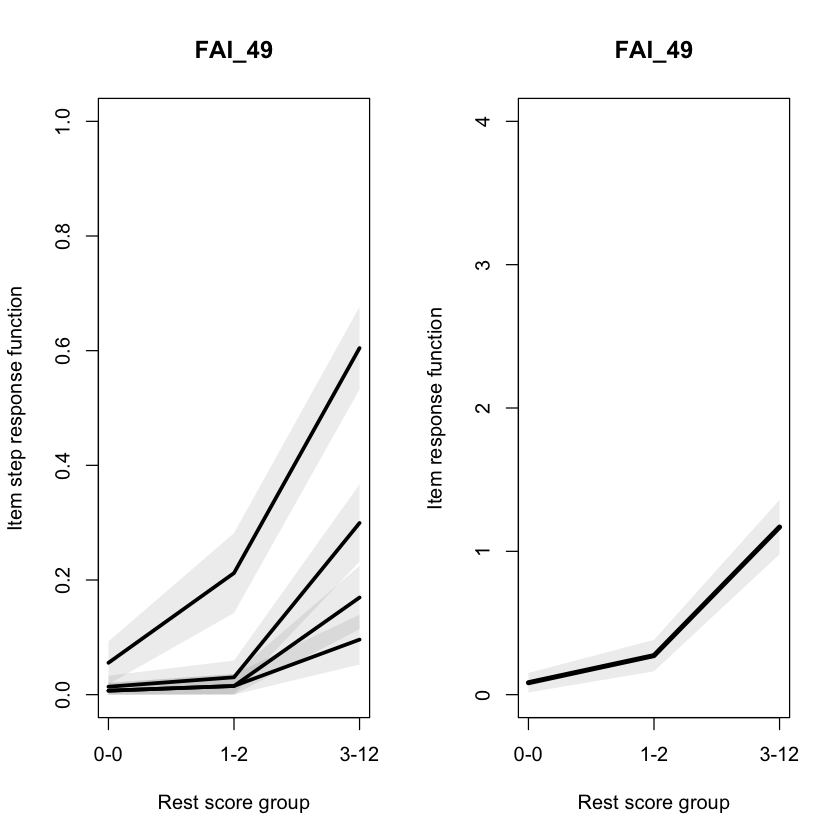

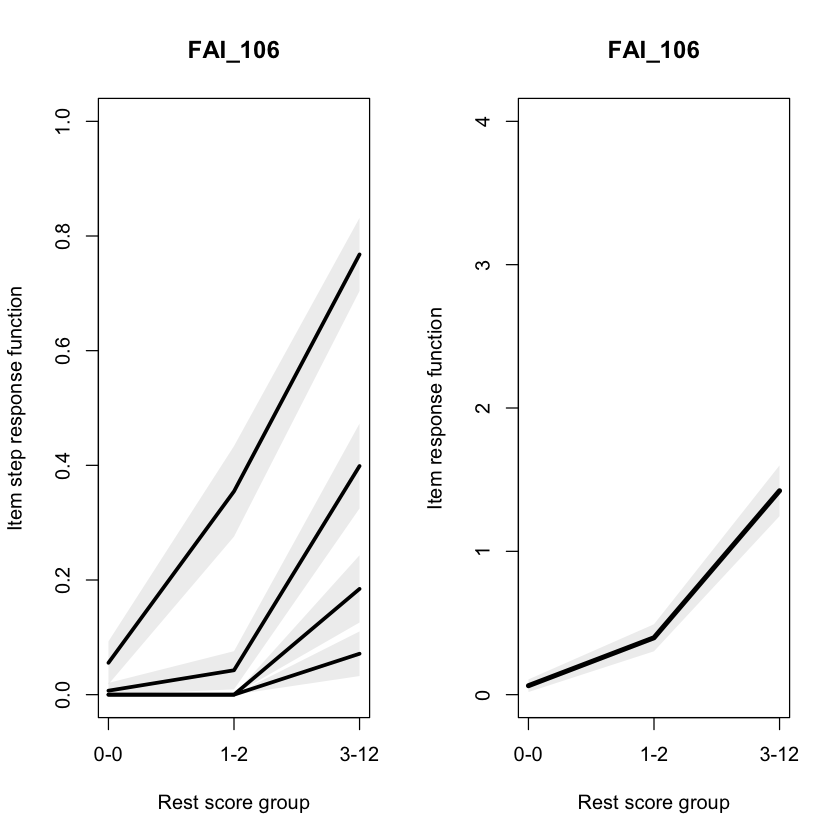

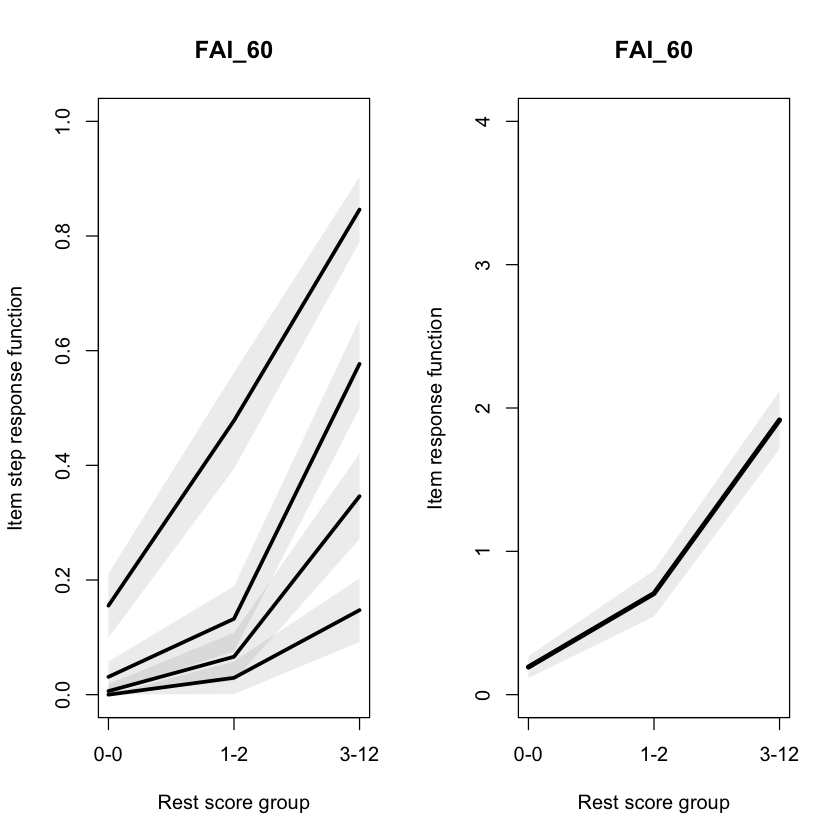

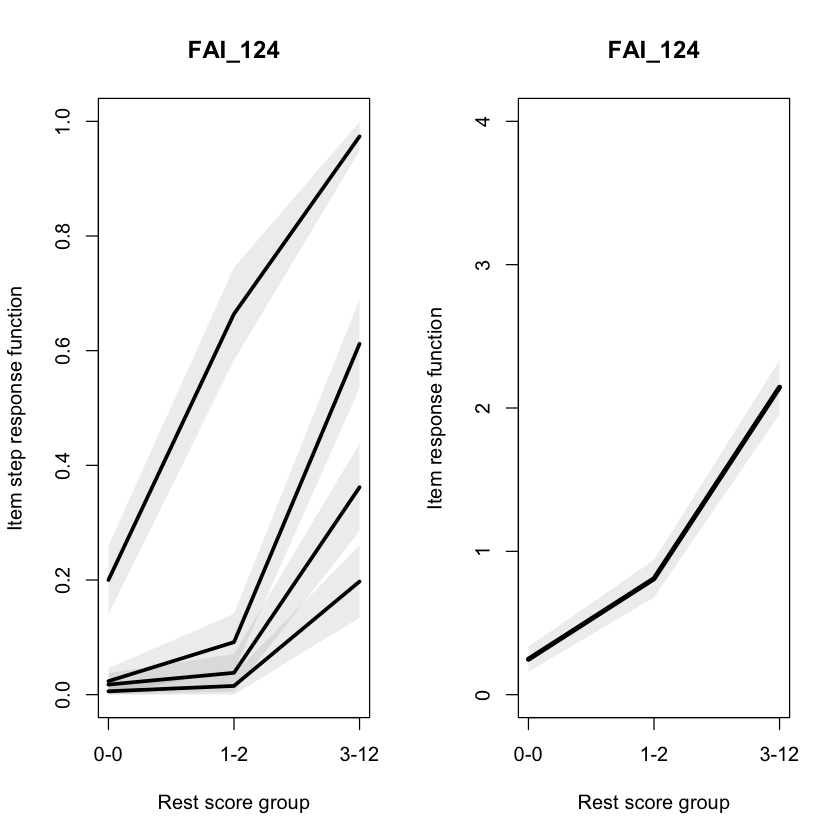

In [9]:
# Examine the monotonicity
mc <- check.monotonicity(good_items)
summary(mc)
plot(mc)

La monotonicità è un'assunzione chiave nella scala Mokken e indica che la probabilità di una risposta positiva (o di punteggio più alto) a un item dovrebbe aumentare all'aumentare del tratto misurato. I grafici forniscono una rappresentazione grafica della monotonicità degli item; le curve corrispondenti a ciascun item salgono costantemente, indicando una buona monotonicità.

La funzione `check.iio()` è usata per controllare l'invarianza dell'ordine degli item (Item Order Invariance, IIO) in una scala Mokken. La IIO è una proprietà che suggerisce che l'ordine degli item secondo la difficoltà o la gravità è lo stesso per tutti i soggetti, indipendentemente dal livello del tratto misurato (ad esempio, abilità o atteggiamento). Un valore H alto per un item indica un buon adattamento dell'item alla scala e una forte invarianza dell'ordine.

In [10]:
summary(check.iio(good_items))

$method
[1] "MIIO"

$item.summary
        ItemH #ac #vi #vi/#ac maxvi sum sum/#ac tmax #tsig crit
FAI_124  0.67   5   0       0     0   0       0    0     0    0
FAI_60   0.64   5   0       0     0   0       0    0     0    0
FAI_106  0.64   6   0       0     0   0       0    0     0    0
FAI_49   0.59   6   0       0     0   0       0    0     0    0

$backward.selection
        step 1
FAI_124      0
FAI_60       0
FAI_106      0
FAI_49       0

$HT
[1] 0.2189009

Il coefficiente di scalabilità H per ogni item si dimostra adeguato. #vi indica il numero di violazioni dell'invarianza dell'ordine degli item. Un valore di 0 indica nessuna violazione. Dai dati, sembra che non ci siano state violazioni dell'invarianza dell'ordine degli item per nessuno degli item testati (#vi è 0 per tutti).

 L'indice $HT rappresenta l'indice di omogeneità di Hoeffding per la scala. L'indice di Hoeffding, denotato come H, è una misura che valuta quanto bene gli item di un test o di una scala si adattano al modello di scala Mokken. Il valore di 0.219 è l'indice di omogeneità di Hoeffding per la scala. Questo valore è considerato piuttosto basso, suggerendo che gli item nella scala potrebbero non essere fortemente scalabili. In genere, si cerca un valore di H superiore a 0.3 per una scala moderatamente forte.
 
In conclusione, mentre l'analisi IIO non ha rilevato problemi di invarianza dell'ordine, l'indice di omogeneità basso solleva questioni sulla forza complessiva della scala. 

Verifichiamo ora l'indipendenza locale. L'indipendenza locale è un'importante proprietà nelle scale Mokken e implica che la relazione tra qualsiasi coppia di item nella scala è indipendente dal livello degli altri item. In altre parole, gli item dovrebbero essere indipendenti l'uno dall'altro, condizionatamente al tratto misurato dalla scala. 

In [11]:
# Check local independence (conditional association)
ca <- check.ca(good_items, TRUE)
ca$InScale
ca$Index
ca$Flagged

[[1]]
[1] TRUE TRUE TRUE TRUE

[[1]]
[[1]]$W1
           FAI_49   FAI_106    FAI_60   FAI_124
FAI_49         NA 0.5757547 0.2865024 0.2792931
FAI_106 1.3893706        NA 0.6868141 1.5522234
FAI_60  0.9243564 0.5425479        NA 1.3992465
FAI_124 0.5795723 0.8785349 0.7368545        NA

[[1]]$W2
         [,1]     [,2]     [,3]     [,4]
[1,] 3.821573 4.854055 4.194256 3.416568

[[1]]$W3
           FAI_49  FAI_106    FAI_60  FAI_124
FAI_49         NA 1.591594 0.8714913 1.358488
FAI_106 1.5915937       NA 2.2635736 0.998888
FAI_60  0.8714913 2.263574        NA 1.059192
FAI_124 1.3584881 0.998888 1.0591917       NA

[[1]]
[[1]]$F1
        FAI_49 FAI_106 FAI_60 FAI_124
FAI_49       0       0      0       0
FAI_106      0       0      0       0
FAI_60       0       0      0       0
FAI_124      0       0      0       0

[[1]]$F2
     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0

[[1]]$F3
        FAI_49 FAI_106 FAI_60 FAI_124
FAI_49       0       0      0       0
FAI_106      0       0      0       0
FAI_60       0       0      0       0
FAI_124      0       0      0       0

"Flagged" si riferisce agli item che mostrano segni di dipendenza locale o di associazione condizionale. Nell'output, "TRUE TRUE TRUE TRUE" suggerisce che tutti gli item esaminati sono stati segnalati come potenzialmente problematici in termini di indipendenza locale. Questo potrebbe indicare che questi item sono correlati tra loro in qualche modo che non è spiegato solo dal tratto misurato dalla scala. Tuttavia, usando un metodo di calcolo diverso, le matrici $F1, $F2, $F3 indicano quali coppie di item superano una certa soglia di associazione condizionale, suggerendo una possibile violazione dell'indipendenza locale. In questo caso, tutte e tre le matrici $F1, $F2, e $F3 mostrano solo zeri, il che significa che nessuna coppia di item ha superato la soglia di preoccupazione per l'associazione condizionale. Questo è in contrasto con il fatto che gli item sono stati segnalati in $Flagged.

Ora adattiamo ai dati il modello Generalized Partial Credit Model (GPCM) con una variante del modello IRT a due parametri (2PL) e calcoliamo gli indici di adattamento degli item (itemfit) utilizzando la funzione msq.itemfit nel pacchetto TAM di R. 

In [12]:
# Fit 2PL IRT Generalized Partial Credit Model
subscale_2pl <- TAM::tam.mml.2pl(
    good_items,
    irtmodel = "GPCM",
    control = list(
        Msteps = 10, QMC = FALSE, snodes = 0,
        convD = .0001, conv = .00001, convM = .00001
    )
)

....................................................
Processing Data      2023-12-20 14:38:40.439701 


    * Response Data: 453 Persons and  4 Items 


    * Numerical integration with 21 nodes
    * Created Design Matrices   ( 2023-12-20 14:38:40.441679 )


    * Calculated Sufficient Statistics   ( 2023-12-20 14:38:40.447436 )


....................................................
Iteration 1     2023-12-20 14:38:40.448856
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-

-


  Deviance = 3840.8656
  Maximum item intercept parameter change: 0.699728
  Maximum item slope parameter change: 0.47538
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 2     2023-12-20 14:38:40.458889
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-

-


  Deviance = 3705.3077 | Absolute change: 135.5579 | Relative change: 0.03658479
  Maximum item intercept parameter change: 0.463226
  Maximum item slope parameter change: 0.391066
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 3     2023-12-20 14:38:40.468183
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-

-


  Deviance = 3676.816 | Absolute change: 28.4916 | Relative change: 0.00774899
  Maximum item intercept parameter change: 0.446325
  Maximum item slope parameter change: 0.432615
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 4     2023-12-20 14:38:40.477784
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-

-


  Deviance = 3663.4238 | Absolute change: 13.3923 | Relative change: 0.00365567
  Maximum item intercept parameter change: 0.143989
  Maximum item slope parameter change: 0.381566
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 5     2023-12-20 14:38:40.487766
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-

-


  Deviance = 3654.7267 | Absolute change: 8.6971 | Relative change: 0.00237968
  Maximum item intercept parameter change: 0.085006
  Maximum item slope parameter change: 0.370382
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 6     2023-12-20 14:38:40.498086
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3647.3651 | Absolute change: 7.3616 | Relative change: 0.00201833
  Maximum item intercept parameter change: 0.093971
  Maximum item slope parameter change: 0.359315
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 7     2023-12-20 14:38:40.507807
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3641.2494 | Absolute change: 6.1157 | Relative change: 0.00167957
  Maximum item intercept parameter change: 0.096754
  Maximum item slope parameter change: 0.345049
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 8     2023-12-20 14:38:40.520071
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3636.2014 | Absolute change: 5.048 | Relative change: 0.00138826
  Maximum item intercept parameter change: 0.097013
  Maximum item slope parameter change: 0.328835
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 9     2023-12-20 14:38:40.528929
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3632.0052 | Absolute change: 4.1962 | Relative change: 0.00115533
  Maximum item intercept parameter change: 0.097399
  Maximum item slope parameter change: 0.312239
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 10     2023-12-20 14:38:40.537669
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3628.5076 | Absolute change: 3.4976 | Relative change: 0.00096393
  Maximum item intercept parameter change: 0.093073
  Maximum item slope parameter change: 0.29381
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 11     2023-12-20 14:38:40.546403
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3625.5677 | Absolute change: 2.9398 | Relative change: 0.00081086
  Maximum item intercept parameter change: 0.092198
  Maximum item slope parameter change: 0.275181
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 12     2023-12-20 14:38:40.555312
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3623.1061 | Absolute change: 2.4617 | Relative change: 0.00067943
  Maximum item intercept parameter change: 0.087329
  Maximum item slope parameter change: 0.258226
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 13     2023-12-20 14:38:40.564052
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3621.0289 | Absolute change: 2.0771 | Relative change: 0.00057363
  Maximum item intercept parameter change: 0.085131
  Maximum item slope parameter change: 0.240552
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 14     2023-12-20 14:38:40.572673
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3619.2762 | Absolute change: 1.7527 | Relative change: 0.00048427
  Maximum item intercept parameter change: 0.080783
  Maximum item slope parameter change: 0.224988
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 15     2023-12-20 14:38:40.581385
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3617.7797 | Absolute change: 1.4965 | Relative change: 0.00041365
  Maximum item intercept parameter change: 0.077143
  Maximum item slope parameter change: 0.210193
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 16     2023-12-20 14:38:40.590134
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3616.4982 | Absolute change: 1.2816 | Relative change: 0.00035437
  Maximum item intercept parameter change: 0.073462
  Maximum item slope parameter change: 0.19651
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 17     2023-12-20 14:38:40.598973
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3615.3951 | Absolute change: 1.1031 | Relative change: 0.00030511
  Maximum item intercept parameter change: 0.069937
  Maximum item slope parameter change: 0.184247
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 18     2023-12-20 14:38:40.60836
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3614.4371 | Absolute change: 0.9579 | Relative change: 0.00026503
  Maximum item intercept parameter change: 0.066656
  Maximum item slope parameter change: 0.171905
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 19     2023-12-20 14:38:40.620759
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3613.6035 | Absolute change: 0.8337 | Relative change: 0.00023071
  Maximum item intercept parameter change: 0.06317
  Maximum item slope parameter change: 0.162293
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 20     2023-12-20 14:38:40.629639
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3612.8707 | Absolute change: 0.7328 | Relative change: 0.00020282
  Maximum item intercept parameter change: 0.060359
  Maximum item slope parameter change: 0.151557
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 21     2023-12-20 14:38:40.638318
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3612.2315 | Absolute change: 0.6392 | Relative change: 0.00017694
  Maximum item intercept parameter change: 0.057056
  Maximum item slope parameter change: 0.143325
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 22     2023-12-20 14:38:40.646952
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3611.6665 | Absolute change: 0.565 | Relative change: 0.00015645
  Maximum item intercept parameter change: 0.054383
  Maximum item slope parameter change: 0.135152
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 23     2023-12-20 14:38:40.655775
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3611.1671 | Absolute change: 0.4994 | Relative change: 0.00013829
  Maximum item intercept parameter change: 0.051683
  Maximum item slope parameter change: 0.127897
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 24     2023-12-20 14:38:40.66458
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3610.724 | Absolute change: 0.4431 | Relative change: 0.00012273
  Maximum item intercept parameter change: 0.049196
  Maximum item slope parameter change: 0.121176
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 25     2023-12-20 14:38:40.673261
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3610.3301 | Absolute change: 0.3939 | Relative change: 0.00010911
  Maximum item intercept parameter change: 0.046831
  Maximum item slope parameter change: 0.11508
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 26     2023-12-20 14:38:40.682001
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3609.9791 | Absolute change: 0.351 | Relative change: 9.722e-05
  Maximum item intercept parameter change: 0.044624
  Maximum item slope parameter change: 0.109425
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 27     2023-12-20 14:38:40.690868
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3609.6657 | Absolute change: 0.3134 | Relative change: 8.681e-05
  Maximum item intercept parameter change: 0.042582
  Maximum item slope parameter change: 0.104206
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 28     2023-12-20 14:38:40.700027
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3609.3854 | Absolute change: 0.2803 | Relative change: 7.767e-05
  Maximum item intercept parameter change: 0.040583
  Maximum item slope parameter change: 0.099391
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 29     2023-12-20 14:38:40.708939
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3609.1342 | Absolute change: 0.2512 | Relative change: 6.959e-05
  Maximum item intercept parameter change: 0.038716
  Maximum item slope parameter change: 0.094944
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 30     2023-12-20 14:38:40.720675
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.9087 | Absolute change: 0.2255 | Relative change: 6.248e-05
  Maximum item intercept parameter change: 0.036969
  Maximum item slope parameter change: 0.090858
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 31     2023-12-20 14:38:40.729447
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.7059 | Absolute change: 0.2029 | Relative change: 5.622e-05
  Maximum item intercept parameter change: 0.035339
  Maximum item slope parameter change: 0.087026
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 32     2023-12-20 14:38:40.738177
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.5229 | Absolute change: 0.1829 | Relative change: 5.07e-05
  Maximum item intercept parameter change: 0.033794
  Maximum item slope parameter change: 0.083501
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 33     2023-12-20 14:38:40.747498
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.3576 | Absolute change: 0.1654 | Relative change: 4.583e-05
  Maximum item intercept parameter change: 0.032354
  Maximum item slope parameter change: 0.080166
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 34     2023-12-20 14:38:40.756291
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.2077 | Absolute change: 0.1498 | Relative change: 4.153e-05
  Maximum item intercept parameter change: 0.030994
  Maximum item slope parameter change: 0.077072
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 35     2023-12-20 14:38:40.765017
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3608.0716 | Absolute change: 0.1361 | Relative change: 3.773e-05
  Maximum item intercept parameter change: 0.02971
  Maximum item slope parameter change: 0.074152
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 36     2023-12-20 14:38:40.773765
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.9476 | Absolute change: 0.124 | Relative change: 3.437e-05
  Maximum item intercept parameter change: 0.02849
  Maximum item slope parameter change: 0.071418
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 37     2023-12-20 14:38:40.782462
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.8344 | Absolute change: 0.1132 | Relative change: 3.138e-05
  Maximum item intercept parameter change: 0.027352
  Maximum item slope parameter change: 0.068902
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 38     2023-12-20 14:38:40.79139
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.7307 | Absolute change: 0.1037 | Relative change: 2.873e-05
  Maximum item intercept parameter change: 0.026299
  Maximum item slope parameter change: 0.066472
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 39     2023-12-20 14:38:40.800263
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.6357 | Absolute change: 0.095 | Relative change: 2.634e-05
  Maximum item intercept parameter change: 0.025292
  Maximum item slope parameter change: 0.064178
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 40     2023-12-20 14:38:40.81195
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.5484 | Absolute change: 0.0873 | Relative change: 2.42e-05
  Maximum item intercept parameter change: 0.024341
  Maximum item slope parameter change: 0.062006
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 41     2023-12-20 14:38:40.82075
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.4679 | Absolute change: 0.0804 | Relative change: 2.23e-05
  Maximum item intercept parameter change: 0.023442
  Maximum item slope parameter change: 0.060093
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 42     2023-12-20 14:38:40.829545
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.3936 | Absolute change: 0.0743 | Relative change: 2.06e-05
  Maximum item intercept parameter change: 0.022632
  Maximum item slope parameter change: 0.057983
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 43     2023-12-20 14:38:40.838244
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.325 | Absolute change: 0.0686 | Relative change: 1.902e-05
  Maximum item intercept parameter change: 0.021782
  Maximum item slope parameter change: 0.056266
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 44     2023-12-20 14:38:40.846996
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.2613 | Absolute change: 0.0636 | Relative change: 1.764e-05
  Maximum item intercept parameter change: 0.021057
  Maximum item slope parameter change: 0.054481
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 45     2023-12-20 14:38:40.855734
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.2023 | Absolute change: 0.0591 | Relative change: 1.638e-05
  Maximum item intercept parameter change: 0.02033
  Maximum item slope parameter change: 0.052786
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 46     2023-12-20 14:38:40.864457
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.1473 | Absolute change: 0.0549 | Relative change: 1.522e-05
  Maximum item intercept parameter change: 0.019641
  Maximum item slope parameter change: 0.051171
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 47     2023-12-20 14:38:40.873296
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.0962 | Absolute change: 0.0511 | Relative change: 1.418e-05
  Maximum item intercept parameter change: 0.01899
  Maximum item slope parameter change: 0.049631
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 48     2023-12-20 14:38:40.882171
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.0485 | Absolute change: 0.0477 | Relative change: 1.322e-05
  Maximum item intercept parameter change: 0.018369
  Maximum item slope parameter change: 0.04816
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 49     2023-12-20 14:38:40.893895
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3607.004 | Absolute change: 0.0446 | Relative change: 1.235e-05
  Maximum item intercept parameter change: 0.017781
  Maximum item slope parameter change: 0.046752
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 50     2023-12-20 14:38:40.902702
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.9623 | Absolute change: 0.0417 | Relative change: 1.155e-05
  Maximum item intercept parameter change: 0.01722
  Maximum item slope parameter change: 0.045403
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 51     2023-12-20 14:38:40.91155
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.9233 | Absolute change: 0.039 | Relative change: 1.082e-05
  Maximum item intercept parameter change: 0.016692
  Maximum item slope parameter change: 0.044107
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 52     2023-12-20 14:38:40.92034
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.8867 | Absolute change: 0.0366 | Relative change: 1.014e-05
  Maximum item intercept parameter change: 0.016178
  Maximum item slope parameter change: 0.042865
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 53     2023-12-20 14:38:40.929159
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.8523 | Absolute change: 0.0343 | Relative change: 9.52e-06
  Maximum item intercept parameter change: 0.015692
  Maximum item slope parameter change: 0.041672
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 54     2023-12-20 14:38:40.937919
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.8201 | Absolute change: 0.0323 | Relative change: 8.95e-06
  Maximum item intercept parameter change: 0.015225
  Maximum item slope parameter change: 0.040527
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 55     2023-12-20 14:38:40.946757
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.7897 | Absolute change: 0.0303 | Relative change: 8.41e-06
  Maximum item intercept parameter change: 0.014782
  Maximum item slope parameter change: 0.039457
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 56     2023-12-20 14:38:40.955562
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.7611 | Absolute change: 0.0286 | Relative change: 7.92e-06
  Maximum item intercept parameter change: 0.014366
  Maximum item slope parameter change: 0.038358
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 57     2023-12-20 14:38:40.964526
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.7342 | Absolute change: 0.0269 | Relative change: 7.46e-06
  Maximum item intercept parameter change: 0.013951
  Maximum item slope parameter change: 0.037367
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 58     2023-12-20 14:38:40.976266
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.7088 | Absolute change: 0.0254 | Relative change: 7.04e-06
  Maximum item intercept parameter change: 0.013559
  Maximum item slope parameter change: 0.036349
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 59     2023-12-20 14:38:40.985198
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.6849 | Absolute change: 0.024 | Relative change: 6.64e-06
  Maximum item intercept parameter change: 0.013182
  Maximum item slope parameter change: 0.035428
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 60     2023-12-20 14:38:40.99406
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.6623 | Absolute change: 0.0226 | Relative change: 6.27e-06
  Maximum item intercept parameter change: 0.012821
  Maximum item slope parameter change: 0.034508
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 61     2023-12-20 14:38:41.002952
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.6409 | Absolute change: 0.0214 | Relative change: 5.93e-06
  Maximum item intercept parameter change: 0.012482
  Maximum item slope parameter change: 0.03362
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 62     2023-12-20 14:38:41.011794
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.6206 | Absolute change: 0.0202 | Relative change: 5.61e-06
  Maximum item intercept parameter change: 0.012142
  Maximum item slope parameter change: 0.032763
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 63     2023-12-20 14:38:41.020704
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.6015 | Absolute change: 0.0191 | Relative change: 5.31e-06
  Maximum item intercept parameter change: 0.011823
  Maximum item slope parameter change: 0.031934
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 64     2023-12-20 14:38:41.029576
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5834 | Absolute change: 0.0181 | Relative change: 5.03e-06
  Maximum item intercept parameter change: 0.011512
  Maximum item slope parameter change: 0.031134
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 65     2023-12-20 14:38:41.038451
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5662 | Absolute change: 0.0172 | Relative change: 4.76e-06
  Maximum item intercept parameter change: 0.011213
  Maximum item slope parameter change: 0.030359
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 66     2023-12-20 14:38:41.050252
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5499 | Absolute change: 0.0163 | Relative change: 4.52e-06
  Maximum item intercept parameter change: 0.010926
  Maximum item slope parameter change: 0.02961
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 67     2023-12-20 14:38:41.059173
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5345 | Absolute change: 0.0154 | Relative change: 4.28e-06
  Maximum item intercept parameter change: 0.010648
  Maximum item slope parameter change: 0.028884
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 68     2023-12-20 14:38:41.068141
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5198 | Absolute change: 0.0147 | Relative change: 4.07e-06
  Maximum item intercept parameter change: 0.01038
  Maximum item slope parameter change: 0.028182
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 69     2023-12-20 14:38:41.076994
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.5059 | Absolute change: 0.0139 | Relative change: 3.86e-06
  Maximum item intercept parameter change: 0.010121
  Maximum item slope parameter change: 0.027501
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 70     2023-12-20 14:38:41.085845
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4927 | Absolute change: 0.0132 | Relative change: 3.67e-06
  Maximum item intercept parameter change: 0.00987
  Maximum item slope parameter change: 0.026841
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 71     2023-12-20 14:38:41.094693
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4801 | Absolute change: 0.0126 | Relative change: 3.48e-06
  Maximum item intercept parameter change: 0.009627
  Maximum item slope parameter change: 0.026201
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 72     2023-12-20 14:38:41.103529
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4681 | Absolute change: 0.0119 | Relative change: 3.31e-06
  Maximum item intercept parameter change: 0.009392
  Maximum item slope parameter change: 0.025581
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 73     2023-12-20 14:38:41.115316
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4568 | Absolute change: 0.0114 | Relative change: 3.15e-06
  Maximum item intercept parameter change: 0.009165
  Maximum item slope parameter change: 0.024979
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 74     2023-12-20 14:38:41.124335
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.446 | Absolute change: 0.0108 | Relative change: 3e-06
  Maximum item intercept parameter change: 0.008945
  Maximum item slope parameter change: 0.024395
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 75     2023-12-20 14:38:41.133267
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4357 | Absolute change: 0.0103 | Relative change: 2.85e-06
  Maximum item intercept parameter change: 0.008731
  Maximum item slope parameter change: 0.023828
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 76     2023-12-20 14:38:41.142207
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4259 | Absolute change: 0.0098 | Relative change: 2.72e-06
  Maximum item intercept parameter change: 0.008525
  Maximum item slope parameter change: 0.023277
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 77     2023-12-20 14:38:41.151149
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4165 | Absolute change: 0.0093 | Relative change: 2.59e-06
  Maximum item intercept parameter change: 0.008324
  Maximum item slope parameter change: 0.022742
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 78     2023-12-20 14:38:41.160071
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.4076 | Absolute change: 0.0089 | Relative change: 2.47e-06
  Maximum item intercept parameter change: 0.008129
  Maximum item slope parameter change: 0.022223
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 79     2023-12-20 14:38:41.168944
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3991 | Absolute change: 0.0085 | Relative change: 2.35e-06
  Maximum item intercept parameter change: 0.00794
  Maximum item slope parameter change: 0.021718
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 80     2023-12-20 14:38:41.270034
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.391 | Absolute change: 0.0081 | Relative change: 2.24e-06
  Maximum item intercept parameter change: 0.007756
  Maximum item slope parameter change: 0.021226
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 81     2023-12-20 14:38:41.278982
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3833 | Absolute change: 0.0077 | Relative change: 2.14e-06
  Maximum item intercept parameter change: 0.007578
  Maximum item slope parameter change: 0.02075
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 82     2023-12-20 14:38:41.287912
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.376 | Absolute change: 0.0074 | Relative change: 2.04e-06
  Maximum item intercept parameter change: 0.007405
  Maximum item slope parameter change: 0.020285
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 83     2023-12-20 14:38:41.29672
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3689 | Absolute change: 0.007 | Relative change: 1.95e-06
  Maximum item intercept parameter change: 0.007238
  Maximum item slope parameter change: 0.019834
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 84     2023-12-20 14:38:41.30537
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3622 | Absolute change: 0.0067 | Relative change: 1.86e-06
  Maximum item intercept parameter change: 0.007074
  Maximum item slope parameter change: 0.019395
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 85     2023-12-20 14:38:41.314213
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3558 | Absolute change: 0.0064 | Relative change: 1.78e-06
  Maximum item intercept parameter change: 0.006916
  Maximum item slope parameter change: 0.018968
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 86     2023-12-20 14:38:41.323001
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3497 | Absolute change: 0.0061 | Relative change: 1.7e-06
  Maximum item intercept parameter change: 0.006761
  Maximum item slope parameter change: 0.018551
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 87     2023-12-20 14:38:41.331632
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3439 | Absolute change: 0.0058 | Relative change: 1.62e-06
  Maximum item intercept parameter change: 0.006611
  Maximum item slope parameter change: 0.018147
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 88     2023-12-20 14:38:41.340275
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3383 | Absolute change: 0.0056 | Relative change: 1.55e-06
  Maximum item intercept parameter change: 0.006465
  Maximum item slope parameter change: 0.017752
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 89     2023-12-20 14:38:41.349087
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.333 | Absolute change: 0.0053 | Relative change: 1.48e-06
  Maximum item intercept parameter change: 0.006323
  Maximum item slope parameter change: 0.017368
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 90     2023-12-20 14:38:41.35786
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3279 | Absolute change: 0.0051 | Relative change: 1.41e-06
  Maximum item intercept parameter change: 0.006184
  Maximum item slope parameter change: 0.016994
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 91     2023-12-20 14:38:41.366729
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.323 | Absolute change: 0.0049 | Relative change: 1.35e-06
  Maximum item intercept parameter change: 0.00605
  Maximum item slope parameter change: 0.01663
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 92     2023-12-20 14:38:41.378223
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3183 | Absolute change: 0.0047 | Relative change: 1.29e-06
  Maximum item intercept parameter change: 0.005919
  Maximum item slope parameter change: 0.016274
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 93     2023-12-20 14:38:41.387004
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-

-


  Deviance = 3606.3138 | Absolute change: 0.0045 | Relative change: 1.24e-06
  Maximum item intercept parameter change: 0.005791
  Maximum item slope parameter change: 0.015928
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 94     2023-12-20 14:38:41.39578
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.3096 | Absolute change: 0.0043 | Relative change: 1.18e-06
  Maximum item intercept parameter change: 0.005666
  Maximum item slope parameter change: 0.015591
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 95     2023-12-20 14:38:41.404043
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.3055 | Absolute change: 0.0041 | Relative change: 1.13e-06
  Maximum item intercept parameter change: 0.005545
  Maximum item slope parameter change: 0.015262
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 96     2023-12-20 14:38:41.412393
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.3016 | Absolute change: 0.0039 | Relative change: 1.09e-06
  Maximum item intercept parameter change: 0.005427
  Maximum item slope parameter change: 0.014941
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 97     2023-12-20 14:38:41.420656
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2978 | Absolute change: 0.0037 | Relative change: 1.04e-06
  Maximum item intercept parameter change: 0.005312
  Maximum item slope parameter change: 0.014628
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 98     2023-12-20 14:38:41.428908
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2942 | Absolute change: 0.0036 | Relative change: 1e-06
  Maximum item intercept parameter change: 0.005199
  Maximum item slope parameter change: 0.014323
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 99     2023-12-20 14:38:41.437082
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2908 | Absolute change: 0.0034 | Relative change: 9.5e-07
  Maximum item intercept parameter change: 0.00509
  Maximum item slope parameter change: 0.014025
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 100     2023-12-20 14:38:41.445344
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2875 | Absolute change: 0.0033 | Relative change: 9.1e-07
  Maximum item intercept parameter change: 0.004983
  Maximum item slope parameter change: 0.013734
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 101     2023-12-20 14:38:41.45368
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2843 | Absolute change: 0.0032 | Relative change: 8.8e-07
  Maximum item intercept parameter change: 0.004879
  Maximum item slope parameter change: 0.013451
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 102     2023-12-20 14:38:41.461902
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2813 | Absolute change: 0.003 | Relative change: 8.4e-07
  Maximum item intercept parameter change: 0.004777
  Maximum item slope parameter change: 0.013174
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 103     2023-12-20 14:38:41.470255
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2784 | Absolute change: 0.0029 | Relative change: 8e-07
  Maximum item intercept parameter change: 0.004678
  Maximum item slope parameter change: 0.012904
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 104     2023-12-20 14:38:41.481544
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2756 | Absolute change: 0.0028 | Relative change: 7.7e-07
  Maximum item intercept parameter change: 0.004581
  Maximum item slope parameter change: 0.01264
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 105     2023-12-20 14:38:41.489815
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.273 | Absolute change: 0.0027 | Relative change: 7.4e-07
  Maximum item intercept parameter change: 0.004487
  Maximum item slope parameter change: 0.012382
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 106     2023-12-20 14:38:41.498136
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2704 | Absolute change: 0.0026 | Relative change: 7.1e-07
  Maximum item intercept parameter change: 0.004395
  Maximum item slope parameter change: 0.01213
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 107     2023-12-20 14:38:41.506398
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.268 | Absolute change: 0.0024 | Relative change: 6.8e-07
  Maximum item intercept parameter change: 0.004305
  Maximum item slope parameter change: 0.011885
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 108     2023-12-20 14:38:41.514696
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2656 | Absolute change: 0.0023 | Relative change: 6.5e-07
  Maximum item intercept parameter change: 0.004217
  Maximum item slope parameter change: 0.011645
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 109     2023-12-20 14:38:41.522864
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2634 | Absolute change: 0.0023 | Relative change: 6.3e-07
  Maximum item intercept parameter change: 0.004131
  Maximum item slope parameter change: 0.01141
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 110     2023-12-20 14:38:41.531186
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2612 | Absolute change: 0.0022 | Relative change: 6e-07
  Maximum item intercept parameter change: 0.004047
  Maximum item slope parameter change: 0.011181
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 111     2023-12-20 14:38:41.539482
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2591 | Absolute change: 0.0021 | Relative change: 5.8e-07
  Maximum item intercept parameter change: 0.003965
  Maximum item slope parameter change: 0.010957
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 112     2023-12-20 14:38:41.547739
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2571 | Absolute change: 0.002 | Relative change: 5.5e-07
  Maximum item intercept parameter change: 0.003886
  Maximum item slope parameter change: 0.010738
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 113     2023-12-20 14:38:41.556131
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2552 | Absolute change: 0.0019 | Relative change: 5.3e-07
  Maximum item intercept parameter change: 0.003807
  Maximum item slope parameter change: 0.010525
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 114     2023-12-20 14:38:41.564313
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2534 | Absolute change: 0.0018 | Relative change: 5.1e-07
  Maximum item intercept parameter change: 0.003731
  Maximum item slope parameter change: 0.010315
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 115     2023-12-20 14:38:41.572598
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2516 | Absolute change: 0.0018 | Relative change: 4.9e-07
  Maximum item intercept parameter change: 0.003657
  Maximum item slope parameter change: 0.010111
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 116     2023-12-20 14:38:41.581015
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2499 | Absolute change: 0.0017 | Relative change: 4.7e-07
  Maximum item intercept parameter change: 0.003584
  Maximum item slope parameter change: 0.009911
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 117     2023-12-20 14:38:41.595811
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2483 | Absolute change: 0.0016 | Relative change: 4.5e-07
  Maximum item intercept parameter change: 0.003512
  Maximum item slope parameter change: 0.009716
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 118     2023-12-20 14:38:41.604209
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2468 | Absolute change: 0.0016 | Relative change: 4.3e-07
  Maximum item intercept parameter change: 0.003443
  Maximum item slope parameter change: 0.009525
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 119     2023-12-20 14:38:41.612512
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2453 | Absolute change: 0.0015 | Relative change: 4.2e-07
  Maximum item intercept parameter change: 0.003374
  Maximum item slope parameter change: 0.009338
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 120     2023-12-20 14:38:41.620886
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2438 | Absolute change: 0.0014 | Relative change: 4e-07
  Maximum item intercept parameter change: 0.003308
  Maximum item slope parameter change: 0.009155
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 121     2023-12-20 14:38:41.629166
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2424 | Absolute change: 0.0014 | Relative change: 3.8e-07
  Maximum item intercept parameter change: 0.003243
  Maximum item slope parameter change: 0.008976
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 122     2023-12-20 14:38:41.63755
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2411 | Absolute change: 0.0013 | Relative change: 3.7e-07
  Maximum item intercept parameter change: 0.003179
  Maximum item slope parameter change: 0.008801
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 123     2023-12-20 14:38:41.645978
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2398 | Absolute change: 0.0013 | Relative change: 3.5e-07
  Maximum item intercept parameter change: 0.003117
  Maximum item slope parameter change: 0.00863
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 124     2023-12-20 14:38:41.654678
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2386 | Absolute change: 0.0012 | Relative change: 3.4e-07
  Maximum item intercept parameter change: 0.003056
  Maximum item slope parameter change: 0.008463
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 125     2023-12-20 14:38:41.663318
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2374 | Absolute change: 0.0012 | Relative change: 3.3e-07
  Maximum item intercept parameter change: 0.002996
  Maximum item slope parameter change: 0.008299
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 126     2023-12-20 14:38:41.671976
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2363 | Absolute change: 0.0011 | Relative change: 3.1e-07
  Maximum item intercept parameter change: 0.002938
  Maximum item slope parameter change: 0.008139
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 127     2023-12-20 14:38:41.681005
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2352 | Absolute change: 0.0011 | Relative change: 3e-07
  Maximum item intercept parameter change: 0.002881
  Maximum item slope parameter change: 0.007982
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 128     2023-12-20 14:38:41.690065
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2342 | Absolute change: 0.001 | Relative change: 2.9e-07
  Maximum item intercept parameter change: 0.002825
  Maximum item slope parameter change: 0.007828
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 129     2023-12-20 14:38:41.701827
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2331 | Absolute change: 0.001 | Relative change: 2.8e-07
  Maximum item intercept parameter change: 0.00277
  Maximum item slope parameter change: 0.007678
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 130     2023-12-20 14:38:41.710128
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2322 | Absolute change: 0.001 | Relative change: 2.7e-07
  Maximum item intercept parameter change: 0.002717
  Maximum item slope parameter change: 0.007531
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 131     2023-12-20 14:38:41.718441
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2312 | Absolute change: 9e-04 | Relative change: 2.6e-07
  Maximum item intercept parameter change: 0.002665
  Maximum item slope parameter change: 0.007387
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 132     2023-12-20 14:38:41.726913
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2304 | Absolute change: 9e-04 | Relative change: 2.5e-07
  Maximum item intercept parameter change: 0.002613
  Maximum item slope parameter change: 0.007246
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 133     2023-12-20 14:38:41.735203
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2295 | Absolute change: 9e-04 | Relative change: 2.4e-07
  Maximum item intercept parameter change: 0.002563
  Maximum item slope parameter change: 0.007108
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 134     2023-12-20 14:38:41.743349
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2287 | Absolute change: 8e-04 | Relative change: 2.3e-07
  Maximum item intercept parameter change: 0.002514
  Maximum item slope parameter change: 0.006972
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 135     2023-12-20 14:38:41.751817
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2279 | Absolute change: 8e-04 | Relative change: 2.2e-07
  Maximum item intercept parameter change: 0.002466
  Maximum item slope parameter change: 0.00684
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 136     2023-12-20 14:38:41.760252
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2271 | Absolute change: 8e-04 | Relative change: 2.1e-07
  Maximum item intercept parameter change: 0.002419
  Maximum item slope parameter change: 0.00671
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 137     2023-12-20 14:38:41.768641
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2264 | Absolute change: 7e-04 | Relative change: 2e-07
  Maximum item intercept parameter change: 0.002373
  Maximum item slope parameter change: 0.006583
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 138     2023-12-20 14:38:41.777288
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2257 | Absolute change: 7e-04 | Relative change: 2e-07
  Maximum item intercept parameter change: 0.002328
  Maximum item slope parameter change: 0.006459
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 139     2023-12-20 14:38:41.785828
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.225 | Absolute change: 7e-04 | Relative change: 1.9e-07
  Maximum item intercept parameter change: 0.002284
  Maximum item slope parameter change: 0.006337
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 140     2023-12-20 14:38:41.794293
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2243 | Absolute change: 7e-04 | Relative change: 1.8e-07
  Maximum item intercept parameter change: 0.00224
  Maximum item slope parameter change: 0.006218
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 141     2023-12-20 14:38:41.803271
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2237 | Absolute change: 6e-04 | Relative change: 1.8e-07
  Maximum item intercept parameter change: 0.002198
  Maximum item slope parameter change: 0.006101
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 142     2023-12-20 14:38:41.814851
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2231 | Absolute change: 6e-04 | Relative change: 1.7e-07
  Maximum item intercept parameter change: 0.002157
  Maximum item slope parameter change: 0.005986
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 143     2023-12-20 14:38:41.823376
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2225 | Absolute change: 6e-04 | Relative change: 1.6e-07
  Maximum item intercept parameter change: 0.002116
  Maximum item slope parameter change: 0.005874
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 144     2023-12-20 14:38:41.831792
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2219 | Absolute change: 6e-04 | Relative change: 1.6e-07
  Maximum item intercept parameter change: 0.002076
  Maximum item slope parameter change: 0.005764
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 145     2023-12-20 14:38:41.8402
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2214 | Absolute change: 5e-04 | Relative change: 1.5e-07
  Maximum item intercept parameter change: 0.002037
  Maximum item slope parameter change: 0.005656
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 146     2023-12-20 14:38:41.848633
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2209 | Absolute change: 5e-04 | Relative change: 1.4e-07
  Maximum item intercept parameter change: 0.001999
  Maximum item slope parameter change: 0.005551
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 147     2023-12-20 14:38:41.857077
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2204 | Absolute change: 5e-04 | Relative change: 1.4e-07
  Maximum item intercept parameter change: 0.001961
  Maximum item slope parameter change: 0.005447
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 148     2023-12-20 14:38:41.865488
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2199 | Absolute change: 5e-04 | Relative change: 1.3e-07
  Maximum item intercept parameter change: 0.001925
  Maximum item slope parameter change: 0.005346
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 149     2023-12-20 14:38:41.873975
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2194 | Absolute change: 5e-04 | Relative change: 1.3e-07
  Maximum item intercept parameter change: 0.001889
  Maximum item slope parameter change: 0.005246
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 150     2023-12-20 14:38:41.882332
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.219 | Absolute change: 4e-04 | Relative change: 1.2e-07
  Maximum item intercept parameter change: 0.001854
  Maximum item slope parameter change: 0.005149
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 151     2023-12-20 14:38:41.890966
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2185 | Absolute change: 4e-04 | Relative change: 1.2e-07
  Maximum item intercept parameter change: 0.001819
  Maximum item slope parameter change: 0.005054
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 152     2023-12-20 14:38:41.899565
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2181 | Absolute change: 4e-04 | Relative change: 1.2e-07
  Maximum item intercept parameter change: 0.001785
  Maximum item slope parameter change: 0.00496
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 153     2023-12-20 14:38:41.908159
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2177 | Absolute change: 4e-04 | Relative change: 1.1e-07
  Maximum item intercept parameter change: 0.001752
  Maximum item slope parameter change: 0.004868
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 154     2023-12-20 14:38:41.919556
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2173 | Absolute change: 4e-04 | Relative change: 1.1e-07
  Maximum item intercept parameter change: 0.001719
  Maximum item slope parameter change: 0.004778
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 155     2023-12-20 14:38:41.927985
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.217 | Absolute change: 4e-04 | Relative change: 1e-07
  Maximum item intercept parameter change: 0.001688
  Maximum item slope parameter change: 0.00469
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 156     2023-12-20 14:38:41.936555
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2166 | Absolute change: 4e-04 | Relative change: 1e-07
  Maximum item intercept parameter change: 0.001656
  Maximum item slope parameter change: 0.004604
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 157     2023-12-20 14:38:41.944978
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2163 | Absolute change: 3e-04 | Relative change: 1e-07
  Maximum item intercept parameter change: 0.001626
  Maximum item slope parameter change: 0.004519
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 158     2023-12-20 14:38:41.953584
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2159 | Absolute change: 3e-04 | Relative change: 9e-08
  Maximum item intercept parameter change: 0.001596
  Maximum item slope parameter change: 0.004436
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 159     2023-12-20 14:38:41.961954
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2156 | Absolute change: 3e-04 | Relative change: 9e-08
  Maximum item intercept parameter change: 0.001566
  Maximum item slope parameter change: 0.004354
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 160     2023-12-20 14:38:41.970379
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2153 | Absolute change: 3e-04 | Relative change: 9e-08
  Maximum item intercept parameter change: 0.001537
  Maximum item slope parameter change: 0.004275
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 161     2023-12-20 14:38:41.979045
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.215 | Absolute change: 3e-04 | Relative change: 8e-08
  Maximum item intercept parameter change: 0.001509
  Maximum item slope parameter change: 0.004196
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 162     2023-12-20 14:38:41.987599
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2147 | Absolute change: 3e-04 | Relative change: 8e-08
  Maximum item intercept parameter change: 0.001481
  Maximum item slope parameter change: 0.004119
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 163     2023-12-20 14:38:41.996135
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2144 | Absolute change: 3e-04 | Relative change: 8e-08
  Maximum item intercept parameter change: 0.001454
  Maximum item slope parameter change: 0.004044
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 164     2023-12-20 14:38:42.004574
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2142 | Absolute change: 3e-04 | Relative change: 7e-08
  Maximum item intercept parameter change: 0.001428
  Maximum item slope parameter change: 0.00397
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 165     2023-12-20 14:38:42.013124
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2139 | Absolute change: 3e-04 | Relative change: 7e-08
  Maximum item intercept parameter change: 0.001401
  Maximum item slope parameter change: 0.003898
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 166     2023-12-20 14:38:42.024708
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2137 | Absolute change: 2e-04 | Relative change: 7e-08
  Maximum item intercept parameter change: 0.001376
  Maximum item slope parameter change: 0.003827
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 167     2023-12-20 14:38:42.033135
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2134 | Absolute change: 2e-04 | Relative change: 7e-08
  Maximum item intercept parameter change: 0.001351
  Maximum item slope parameter change: 0.003757
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 168     2023-12-20 14:38:42.04172
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2132 | Absolute change: 2e-04 | Relative change: 6e-08
  Maximum item intercept parameter change: 0.001326
  Maximum item slope parameter change: 0.003689
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 169     2023-12-20 14:38:42.05018
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.213 | Absolute change: 2e-04 | Relative change: 6e-08
  Maximum item intercept parameter change: 0.001302
  Maximum item slope parameter change: 0.003621
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 170     2023-12-20 14:38:42.058686
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2128 | Absolute change: 2e-04 | Relative change: 6e-08
  Maximum item intercept parameter change: 0.001278
  Maximum item slope parameter change: 0.003556
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 171     2023-12-20 14:38:42.067294
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2126 | Absolute change: 2e-04 | Relative change: 6e-08
  Maximum item intercept parameter change: 0.001255
  Maximum item slope parameter change: 0.003491
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 172     2023-12-20 14:38:42.075709
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2124 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.001232
  Maximum item slope parameter change: 0.003428
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 173     2023-12-20 14:38:42.084388
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2122 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.00121
  Maximum item slope parameter change: 0.003366
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 174     2023-12-20 14:38:42.093081
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.212 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.001188
  Maximum item slope parameter change: 0.003305
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 175     2023-12-20 14:38:42.10162
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2118 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.001166
  Maximum item slope parameter change: 0.003245
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 176     2023-12-20 14:38:42.11035
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2116 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.001145
  Maximum item slope parameter change: 0.003186
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 177     2023-12-20 14:38:42.119152
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2115 | Absolute change: 2e-04 | Relative change: 5e-08
  Maximum item intercept parameter change: 0.001124
  Maximum item slope parameter change: 0.003129
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 178     2023-12-20 14:38:42.127977
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2113 | Absolute change: 2e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001104
  Maximum item slope parameter change: 0.003072
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 179     2023-12-20 14:38:42.13973
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2112 | Absolute change: 2e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001084
  Maximum item slope parameter change: 0.003017
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 180     2023-12-20 14:38:42.148337
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.211 | Absolute change: 1e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001064
  Maximum item slope parameter change: 0.002963
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 181     2023-12-20 14:38:42.156853
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2109 | Absolute change: 1e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001045
  Maximum item slope parameter change: 0.002909
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 182     2023-12-20 14:38:42.165447
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2107 | Absolute change: 1e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001026
  Maximum item slope parameter change: 0.002857
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 183     2023-12-20 14:38:42.173909
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2106 | Absolute change: 1e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.001008
  Maximum item slope parameter change: 0.002806
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 184     2023-12-20 14:38:42.18259
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2105 | Absolute change: 1e-04 | Relative change: 4e-08
  Maximum item intercept parameter change: 0.00099
  Maximum item slope parameter change: 0.002755
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 185     2023-12-20 14:38:42.191241
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2104 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000972
  Maximum item slope parameter change: 0.002706
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 186     2023-12-20 14:38:42.200002
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2102 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000954
  Maximum item slope parameter change: 0.002657
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 187     2023-12-20 14:38:42.2086
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2101 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000937
  Maximum item slope parameter change: 0.00261
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 188     2023-12-20 14:38:42.217415
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.21 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.00092
  Maximum item slope parameter change: 0.002563
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 189     2023-12-20 14:38:42.226155
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2099 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000904
  Maximum item slope parameter change: 0.002517
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 190     2023-12-20 14:38:42.235127
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2098 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000888
  Maximum item slope parameter change: 0.002472
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 191     2023-12-20 14:38:42.247095
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2097 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000872
  Maximum item slope parameter change: 0.002428
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 192     2023-12-20 14:38:42.255625
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2096 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000861
  Maximum item slope parameter change: 0.002399
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 193     2023-12-20 14:38:42.263774
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2095 | Absolute change: 1e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000846
  Maximum item slope parameter change: 0.002356
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 194     2023-12-20 14:38:42.272055
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2094 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000831
  Maximum item slope parameter change: 0.002314
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 195     2023-12-20 14:38:42.280243
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2094 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000816
  Maximum item slope parameter change: 0.002272
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 196     2023-12-20 14:38:42.288548
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2093 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000801
  Maximum item slope parameter change: 0.002232
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 197     2023-12-20 14:38:42.296781
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2092 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000787
  Maximum item slope parameter change: 0.002192
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 198     2023-12-20 14:38:42.305113
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2091 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000773
  Maximum item slope parameter change: 0.002152
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 199     2023-12-20 14:38:42.313335
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.209 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000759
  Maximum item slope parameter change: 0.002114
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 200     2023-12-20 14:38:42.321622
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.209 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000745
  Maximum item slope parameter change: 0.002076
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 201     2023-12-20 14:38:42.329926
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2089 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000732
  Maximum item slope parameter change: 0.002039
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 202     2023-12-20 14:38:42.338111
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2088 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000719
  Maximum item slope parameter change: 0.002002
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 203     2023-12-20 14:38:42.346397
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2088 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000706
  Maximum item slope parameter change: 0.001967
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 204     2023-12-20 14:38:42.357772
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2087 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000693
  Maximum item slope parameter change: 0.001931
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 205     2023-12-20 14:38:42.366004
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2086 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000681
  Maximum item slope parameter change: 0.001897
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 206     2023-12-20 14:38:42.374125
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2086 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000669
  Maximum item slope parameter change: 0.001863
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 207     2023-12-20 14:38:42.382257
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2085 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000657
  Maximum item slope parameter change: 0.00183
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 208     2023-12-20 14:38:42.390372
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2085 | Absolute change: 1e-04 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000645
  Maximum item slope parameter change: 0.001797
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 209     2023-12-20 14:38:42.398576
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2084 | Absolute change: 1e-04 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000633
  Maximum item slope parameter change: 0.001765
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 210     2023-12-20 14:38:42.40685
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2084 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000622
  Maximum item slope parameter change: 0.001734
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 211     2023-12-20 14:38:42.415149
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2083 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000611
  Maximum item slope parameter change: 0.001703
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 212     2023-12-20 14:38:42.423463
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2083 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 6e-04
  Maximum item slope parameter change: 0.001672
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 213     2023-12-20 14:38:42.431722
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2082 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000589
  Maximum item slope parameter change: 0.001643
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 214     2023-12-20 14:38:42.439944
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2082 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000579
  Maximum item slope parameter change: 0.001613
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 215     2023-12-20 14:38:42.448315
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2082 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000569
  Maximum item slope parameter change: 0.001585
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 216     2023-12-20 14:38:42.456777
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2081 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000558
  Maximum item slope parameter change: 0.001557
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 217     2023-12-20 14:38:42.468098
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2081 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000548
  Maximum item slope parameter change: 0.001529
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 218     2023-12-20 14:38:42.476204
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.208 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000539
  Maximum item slope parameter change: 0.001502
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 219     2023-12-20 14:38:42.48446
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.208 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000529
  Maximum item slope parameter change: 0.001475
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 220     2023-12-20 14:38:42.492646
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.208 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.00052
  Maximum item slope parameter change: 0.001449
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 221     2023-12-20 14:38:42.500836
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2079 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.00051
  Maximum item slope parameter change: 0.001423
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 222     2023-12-20 14:38:42.508985
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2079 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000501
  Maximum item slope parameter change: 0.001398
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 223     2023-12-20 14:38:42.517196
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2079 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000493
  Maximum item slope parameter change: 0.001373
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 224     2023-12-20 14:38:42.525586
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2078 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000478
  Maximum item slope parameter change: 0.001334
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 225     2023-12-20 14:38:42.533426
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2078 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.00047
  Maximum item slope parameter change: 0.00131
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 226     2023-12-20 14:38:42.541245
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2078 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000462
  Maximum item slope parameter change: 0.001287
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 227     2023-12-20 14:38:42.549167
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2078 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000454
  Maximum item slope parameter change: 0.001265
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 228     2023-12-20 14:38:42.557038
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2077 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000446
  Maximum item slope parameter change: 0.001242
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 229     2023-12-20 14:38:42.564949
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2077 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000438
  Maximum item slope parameter change: 0.001221
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 230     2023-12-20 14:38:42.572861
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2077 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.00043
  Maximum item slope parameter change: 0.001199
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 231     2023-12-20 14:38:42.583779
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2077 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000423
  Maximum item slope parameter change: 0.001178
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 232     2023-12-20 14:38:42.591499
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2076 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000415
  Maximum item slope parameter change: 0.001158
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 233     2023-12-20 14:38:42.599333
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2076 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000408
  Maximum item slope parameter change: 0.001137
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 234     2023-12-20 14:38:42.607095
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2076 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000401
  Maximum item slope parameter change: 0.001118
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 235     2023-12-20 14:38:42.61489
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2076 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000394
  Maximum item slope parameter change: 0.001098
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 236     2023-12-20 14:38:42.622627
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2076 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000387
  Maximum item slope parameter change: 0.001079
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 237     2023-12-20 14:38:42.630367
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.00038
  Maximum item slope parameter change: 0.00106
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 238     2023-12-20 14:38:42.638095
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 0.000373
  Maximum item slope parameter change: 0.001042
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 239     2023-12-20 14:38:42.645967
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000367
  Maximum item slope parameter change: 0.001023
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 240     2023-12-20 14:38:42.653807
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000361
  Maximum item slope parameter change: 0.001006
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 241     2023-12-20 14:38:42.661655
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000354
  Maximum item slope parameter change: 0.000988
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 242     2023-12-20 14:38:42.669525
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2075 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000348
  Maximum item slope parameter change: 0.000971
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 243     2023-12-20 14:38:42.677321
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000342
  Maximum item slope parameter change: 0.000954
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 244     2023-12-20 14:38:42.685157
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000336
  Maximum item slope parameter change: 0.000937
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 245     2023-12-20 14:38:42.695899
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.00033
  Maximum item slope parameter change: 0.000921
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 246     2023-12-20 14:38:42.703677
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000324
  Maximum item slope parameter change: 0.000905
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 247     2023-12-20 14:38:42.711499
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000319
  Maximum item slope parameter change: 0.000889
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 248     2023-12-20 14:38:42.71913
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000313
  Maximum item slope parameter change: 0.000874
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 249     2023-12-20 14:38:42.726912
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2074 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000308
  Maximum item slope parameter change: 0.000858
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 250     2023-12-20 14:38:42.73472
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000302
  Maximum item slope parameter change: 0.000844
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 251     2023-12-20 14:38:42.742564
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000297
  Maximum item slope parameter change: 0.000829
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 252     2023-12-20 14:38:42.750422
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000292
  Maximum item slope parameter change: 0.000814
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 253     2023-12-20 14:38:42.758276
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000287
  Maximum item slope parameter change: 8e-04
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 254     2023-12-20 14:38:42.766183
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000282
  Maximum item slope parameter change: 0.000786
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 255     2023-12-20 14:38:42.77405
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000277
  Maximum item slope parameter change: 0.000773
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 256     2023-12-20 14:38:42.782059
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000272
  Maximum item slope parameter change: 0.000759
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 257     2023-12-20 14:38:42.789942
E Step


M Step Intercepts   |

-

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000267
  Maximum item slope parameter change: 0.000746
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 258     2023-12-20 14:38:42.800761
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000268
  Maximum item slope parameter change: 0.000748
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 259     2023-12-20 14:38:42.808077
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2073 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000263
  Maximum item slope parameter change: 0.000735
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 260     2023-12-20 14:38:42.81537
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000259
  Maximum item slope parameter change: 0.000722
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 261     2023-12-20 14:38:42.822641
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000254
  Maximum item slope parameter change: 0.000709
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 262     2023-12-20 14:38:42.829881
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.00025
  Maximum item slope parameter change: 0.000697
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 263     2023-12-20 14:38:42.836972
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000245
  Maximum item slope parameter change: 0.000684
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 264     2023-12-20 14:38:42.84427
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000241
  Maximum item slope parameter change: 0.000672
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 265     2023-12-20 14:38:42.851689
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000237
  Maximum item slope parameter change: 0.00066
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 266     2023-12-20 14:38:42.859086
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000233
  Maximum item slope parameter change: 0.000649
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 267     2023-12-20 14:38:42.866512
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000228
  Maximum item slope parameter change: 0.000637
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 268     2023-12-20 14:38:42.874014
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000224
  Maximum item slope parameter change: 0.000626
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 269     2023-12-20 14:38:42.881424
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.00022
  Maximum item slope parameter change: 0.000615
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 270     2023-12-20 14:38:42.888931
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000216
  Maximum item slope parameter change: 0.000604
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 271     2023-12-20 14:38:42.899273
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000213
  Maximum item slope parameter change: 0.000593
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 272     2023-12-20 14:38:42.906588
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000209
  Maximum item slope parameter change: 0.000583
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 273     2023-12-20 14:38:42.913863
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000205
  Maximum item slope parameter change: 0.000572
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 274     2023-12-20 14:38:42.921198
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2072 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000202
  Maximum item slope parameter change: 0.000562
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 275     2023-12-20 14:38:42.92849
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000198
  Maximum item slope parameter change: 0.000552
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 276     2023-12-20 14:38:42.935797
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000194
  Maximum item slope parameter change: 0.000543
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 277     2023-12-20 14:38:42.943159
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000191
  Maximum item slope parameter change: 0.000533
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 278     2023-12-20 14:38:42.950427
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000188
  Maximum item slope parameter change: 0.000524
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 279     2023-12-20 14:38:42.957898
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000184
  Maximum item slope parameter change: 0.000514
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 280     2023-12-20 14:38:42.965331
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000181
  Maximum item slope parameter change: 0.000505
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 281     2023-12-20 14:38:42.972802
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000178
  Maximum item slope parameter change: 0.000496
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 282     2023-12-20 14:38:42.980333
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000175
  Maximum item slope parameter change: 0.000488
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 283     2023-12-20 14:38:42.990857
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000172
  Maximum item slope parameter change: 0.000479
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 284     2023-12-20 14:38:42.99826
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000169
  Maximum item slope parameter change: 0.00047
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 285     2023-12-20 14:38:43.005545
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000166
  Maximum item slope parameter change: 0.000462
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 286     2023-12-20 14:38:43.012792
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000163
  Maximum item slope parameter change: 0.000454
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 287     2023-12-20 14:38:43.020117
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.00016
  Maximum item slope parameter change: 0.000446
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 288     2023-12-20 14:38:43.027404
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000157
  Maximum item slope parameter change: 0.000438
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 289     2023-12-20 14:38:43.034718
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000154
  Maximum item slope parameter change: 0.00043
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 290     2023-12-20 14:38:43.04206
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000152
  Maximum item slope parameter change: 0.000423
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 291     2023-12-20 14:38:43.049434
E Step


M Step Intercepts   |

-

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000149
  Maximum item slope parameter change: 0.000415
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 292     2023-12-20 14:38:43.057019
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000141
  Maximum item slope parameter change: 0.000393
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 293     2023-12-20 14:38:43.063997
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000139
  Maximum item slope parameter change: 0.000386
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 294     2023-12-20 14:38:43.07089
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000136
  Maximum item slope parameter change: 0.00038
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 295     2023-12-20 14:38:43.077907
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000134
  Maximum item slope parameter change: 0.000373
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 296     2023-12-20 14:38:43.087746
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000131
  Maximum item slope parameter change: 0.000367
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 297     2023-12-20 14:38:43.094516
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000129
  Maximum item slope parameter change: 0.000361
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 298     2023-12-20 14:38:43.101502
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000127
  Maximum item slope parameter change: 0.000354
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 299     2023-12-20 14:38:43.108337
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000125
  Maximum item slope parameter change: 0.000348
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 300     2023-12-20 14:38:43.115133
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000123
  Maximum item slope parameter change: 0.000342
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 301     2023-12-20 14:38:43.121983
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000121
  Maximum item slope parameter change: 0.000337
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 302     2023-12-20 14:38:43.128826
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000119
  Maximum item slope parameter change: 0.000331
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 303     2023-12-20 14:38:43.135715
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000117
  Maximum item slope parameter change: 0.000325
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 304     2023-12-20 14:38:43.142605
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000115
  Maximum item slope parameter change: 0.00032
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 305     2023-12-20 14:38:43.149822
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000113
  Maximum item slope parameter change: 0.000314
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 306     2023-12-20 14:38:43.156847
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000111
  Maximum item slope parameter change: 0.000309
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 307     2023-12-20 14:38:43.163742
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000109
  Maximum item slope parameter change: 0.000304
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 308     2023-12-20 14:38:43.173601
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000107
  Maximum item slope parameter change: 0.000299
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 309     2023-12-20 14:38:43.180508
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.2071 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000105
  Maximum item slope parameter change: 0.000294
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 310     2023-12-20 14:38:43.187416
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000103
  Maximum item slope parameter change: 0.000289
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 311     2023-12-20 14:38:43.194228
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000102
  Maximum item slope parameter change: 0.000284
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 312     2023-12-20 14:38:43.201167
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1e-04
  Maximum item slope parameter change: 0.000279
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 313     2023-12-20 14:38:43.208058
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9.8e-05
  Maximum item slope parameter change: 0.000274
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 314     2023-12-20 14:38:43.214995
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9.7e-05
  Maximum item slope parameter change: 0.000269
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 315     2023-12-20 14:38:43.221888
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9.5e-05
  Maximum item slope parameter change: 0.000265
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 316     2023-12-20 14:38:43.228923
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9.3e-05
  Maximum item slope parameter change: 0.00026
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 317     2023-12-20 14:38:43.235905
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9.2e-05
  Maximum item slope parameter change: 0.000256
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 318     2023-12-20 14:38:43.242768
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-05
  Maximum item slope parameter change: 0.000252
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 319     2023-12-20 14:38:43.249773
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.9e-05
  Maximum item slope parameter change: 0.000247
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 320     2023-12-20 14:38:43.259545
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.7e-05
  Maximum item slope parameter change: 0.000243
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 321     2023-12-20 14:38:43.266344
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.6e-05
  Maximum item slope parameter change: 0.000239
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 322     2023-12-20 14:38:43.273314
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.4e-05
  Maximum item slope parameter change: 0.000235
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 323     2023-12-20 14:38:43.280221
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.3e-05
  Maximum item slope parameter change: 0.000231
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 324     2023-12-20 14:38:43.287181
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.1e-05
  Maximum item slope parameter change: 0.000227
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 325     2023-12-20 14:38:43.294076
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-05
  Maximum item slope parameter change: 0.000223
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 326     2023-12-20 14:38:43.300972
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.9e-05
  Maximum item slope parameter change: 0.000219
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 327     2023-12-20 14:38:43.307894
E Step


M Step Intercepts   |

-

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.7e-05
  Maximum item slope parameter change: 0.000216
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 328     2023-12-20 14:38:43.314722
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8.1e-05
  Maximum item slope parameter change: 0.000227
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 329     2023-12-20 14:38:43.321071
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-05
  Maximum item slope parameter change: 0.000223
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 330     2023-12-20 14:38:43.327418
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.8e-05
  Maximum item slope parameter change: 0.000219
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 331     2023-12-20 14:38:43.333766
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.7e-05
  Maximum item slope parameter change: 0.000215
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 332     2023-12-20 14:38:43.343105
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.6e-05
  Maximum item slope parameter change: 0.000211
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 333     2023-12-20 14:38:43.349451
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.4e-05
  Maximum item slope parameter change: 0.000207
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 334     2023-12-20 14:38:43.355888
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.3e-05
  Maximum item slope parameter change: 0.000204
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 335     2023-12-20 14:38:43.362285
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7.2e-05
  Maximum item slope parameter change: 2e-04
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 336     2023-12-20 14:38:43.368597
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-05
  Maximum item slope parameter change: 0.000196
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 337     2023-12-20 14:38:43.374971
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.9e-05
  Maximum item slope parameter change: 0.000193
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 338     2023-12-20 14:38:43.381382
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.8e-05
  Maximum item slope parameter change: 0.000189
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 339     2023-12-20 14:38:43.387771
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.7e-05
  Maximum item slope parameter change: 0.000186
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 340     2023-12-20 14:38:43.394158
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.5e-05
  Maximum item slope parameter change: 0.000182
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 341     2023-12-20 14:38:43.40054
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.4e-05
  Maximum item slope parameter change: 0.000179
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 342     2023-12-20 14:38:43.406931
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.3e-05
  Maximum item slope parameter change: 0.000176
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 343     2023-12-20 14:38:43.416332
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.2e-05
  Maximum item slope parameter change: 0.000173
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 344     2023-12-20 14:38:43.422729
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6.1e-05
  Maximum item slope parameter change: 0.000169
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 345     2023-12-20 14:38:43.429132
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-05
  Maximum item slope parameter change: 0.000166
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 346     2023-12-20 14:38:43.435513
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.9e-05
  Maximum item slope parameter change: 0.000163
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 347     2023-12-20 14:38:43.441953
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.7e-05
  Maximum item slope parameter change: 0.00016
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 348     2023-12-20 14:38:43.448418
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.6e-05
  Maximum item slope parameter change: 0.000158
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 349     2023-12-20 14:38:43.454782
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.5e-05
  Maximum item slope parameter change: 0.000155
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 350     2023-12-20 14:38:43.461171
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.4e-05
  Maximum item slope parameter change: 0.000152
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 351     2023-12-20 14:38:43.467608
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.3e-05
  Maximum item slope parameter change: 0.000149
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 352     2023-12-20 14:38:43.474084
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.2e-05
  Maximum item slope parameter change: 0.000146
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 353     2023-12-20 14:38:43.480523
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.2e-05
  Maximum item slope parameter change: 0.000144
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 354     2023-12-20 14:38:43.486927
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5.1e-05
  Maximum item slope parameter change: 0.000141
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 355     2023-12-20 14:38:43.496285
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-05
  Maximum item slope parameter change: 0.000139
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 356     2023-12-20 14:38:43.502707
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4.9e-05
  Maximum item slope parameter change: 0.000136
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 357     2023-12-20 14:38:43.509166
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4.8e-05
  Maximum item slope parameter change: 0.000134
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 358     2023-12-20 14:38:43.515575
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4.7e-05
  Maximum item slope parameter change: 0.000131
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 359     2023-12-20 14:38:43.521887
E Step


M Step Intercepts   |

-

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4.6e-05
  Maximum item slope parameter change: 0.000129
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 360     2023-12-20 14:38:43.528192
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-05
  Maximum item slope parameter change: 0.000111
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 361     2023-12-20 14:38:43.533975
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.9e-05
  Maximum item slope parameter change: 0.000109
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 362     2023-12-20 14:38:43.539805
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.9e-05
  Maximum item slope parameter change: 0.000108
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 363     2023-12-20 14:38:43.545648
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.8e-05
  Maximum item slope parameter change: 0.000106
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 364     2023-12-20 14:38:43.551695
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.7e-05
  Maximum item slope parameter change: 0.000104
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 365     2023-12-20 14:38:43.557789
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.7e-05
  Maximum item slope parameter change: 0.000103
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 366     2023-12-20 14:38:43.566803
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.6e-05
  Maximum item slope parameter change: 0.000101
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 367     2023-12-20 14:38:43.572656
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.6e-05
  Maximum item slope parameter change: 9.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 368     2023-12-20 14:38:43.578524
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.5e-05
  Maximum item slope parameter change: 9.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 369     2023-12-20 14:38:43.584284
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.4e-05
  Maximum item slope parameter change: 9.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 370     2023-12-20 14:38:43.590118
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.4e-05
  Maximum item slope parameter change: 9.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 371     2023-12-20 14:38:43.59598
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.3e-05
  Maximum item slope parameter change: 9.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 372     2023-12-20 14:38:43.601939
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.3e-05
  Maximum item slope parameter change: 9.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 373     2023-12-20 14:38:43.607966
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.2e-05
  Maximum item slope parameter change: 9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 374     2023-12-20 14:38:43.613945
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.2e-05
  Maximum item slope parameter change: 8.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 375     2023-12-20 14:38:43.619928
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.1e-05
  Maximum item slope parameter change: 8.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 376     2023-12-20 14:38:43.625872
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.1e-05
  Maximum item slope parameter change: 8.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 377     2023-12-20 14:38:43.637596
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3e-05
  Maximum item slope parameter change: 8.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 378     2023-12-20 14:38:43.643608
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3e-05
  Maximum item slope parameter change: 8.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 379     2023-12-20 14:38:43.649529
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.9e-05
  Maximum item slope parameter change: 8.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 380     2023-12-20 14:38:43.655482
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.9e-05
  Maximum item slope parameter change: 8.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 381     2023-12-20 14:38:43.661483
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.8e-05
  Maximum item slope parameter change: 7.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 382     2023-12-20 14:38:43.667477
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.8e-05
  Maximum item slope parameter change: 7.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 383     2023-12-20 14:38:43.673513
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.8e-05
  Maximum item slope parameter change: 7.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 384     2023-12-20 14:38:43.679384
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.7e-05
  Maximum item slope parameter change: 7.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 385     2023-12-20 14:38:43.685306
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.7e-05
  Maximum item slope parameter change: 7.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 386     2023-12-20 14:38:43.691314
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.6e-05
  Maximum item slope parameter change: 7.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 387     2023-12-20 14:38:43.697423
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.6e-05
  Maximum item slope parameter change: 7.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 388     2023-12-20 14:38:43.703566
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.5e-05
  Maximum item slope parameter change: 7.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 389     2023-12-20 14:38:43.709645
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.5e-05
  Maximum item slope parameter change: 7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 390     2023-12-20 14:38:43.715765
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.5e-05
  Maximum item slope parameter change: 6.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 391     2023-12-20 14:38:43.721901
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.4e-05
  Maximum item slope parameter change: 6.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 392     2023-12-20 14:38:43.73121
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.4e-05
  Maximum item slope parameter change: 6.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 393     2023-12-20 14:38:43.737081
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.3e-05
  Maximum item slope parameter change: 6.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 394     2023-12-20 14:38:43.743055
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.3e-05
  Maximum item slope parameter change: 6.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 395     2023-12-20 14:38:43.748988
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.3e-05
  Maximum item slope parameter change: 6.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 396     2023-12-20 14:38:43.754988
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.2e-05
  Maximum item slope parameter change: 6.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 397     2023-12-20 14:38:43.761046
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.2e-05
  Maximum item slope parameter change: 6.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 398     2023-12-20 14:38:43.766957
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.2e-05
  Maximum item slope parameter change: 6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 399     2023-12-20 14:38:43.772897
E Step


M Step Intercepts   |

-

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.1e-05
  Maximum item slope parameter change: 5.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 400     2023-12-20 14:38:43.779084
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.6e-05
  Maximum item slope parameter change: 7.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 401     2023-12-20 14:38:43.785833
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.6e-05
  Maximum item slope parameter change: 7.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 402     2023-12-20 14:38:43.791355
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.5e-05
  Maximum item slope parameter change: 7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 403     2023-12-20 14:38:43.796971
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.5e-05
  Maximum item slope parameter change: 6.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 404     2023-12-20 14:38:43.802642
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.4e-05
  Maximum item slope parameter change: 6.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 405     2023-12-20 14:38:43.808299
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.4e-05
  Maximum item slope parameter change: 6.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 406     2023-12-20 14:38:43.817116
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.3e-05
  Maximum item slope parameter change: 6.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 407     2023-12-20 14:38:43.822566
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.3e-05
  Maximum item slope parameter change: 6.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 408     2023-12-20 14:38:43.828077
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.2e-05
  Maximum item slope parameter change: 6.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 409     2023-12-20 14:38:43.83346
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.2e-05
  Maximum item slope parameter change: 6.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 410     2023-12-20 14:38:43.838809
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.1e-05
  Maximum item slope parameter change: 6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 411     2023-12-20 14:38:43.844434
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.1e-05
  Maximum item slope parameter change: 5.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 412     2023-12-20 14:38:43.849959
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2.1e-05
  Maximum item slope parameter change: 5.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 413     2023-12-20 14:38:43.85542
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2e-05
  Maximum item slope parameter change: 5.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 414     2023-12-20 14:38:43.861016
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 2e-05
  Maximum item slope parameter change: 5.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 415     2023-12-20 14:38:43.866621
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.9e-05
  Maximum item slope parameter change: 5.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 416     2023-12-20 14:38:43.872179
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.9e-05
  Maximum item slope parameter change: 5.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 417     2023-12-20 14:38:43.877863
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.9e-05
  Maximum item slope parameter change: 5.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 418     2023-12-20 14:38:43.883551
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.8e-05
  Maximum item slope parameter change: 5.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 419     2023-12-20 14:38:43.889005
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.8e-05
  Maximum item slope parameter change: 5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 420     2023-12-20 14:38:43.897719
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.8e-05
  Maximum item slope parameter change: 4.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 421     2023-12-20 14:38:43.903237
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.7e-05
  Maximum item slope parameter change: 4.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 422     2023-12-20 14:38:43.908708
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.7e-05
  Maximum item slope parameter change: 4.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 423     2023-12-20 14:38:43.914098
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.7e-05
  Maximum item slope parameter change: 4.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 424     2023-12-20 14:38:43.919527
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.6e-05
  Maximum item slope parameter change: 4.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 425     2023-12-20 14:38:43.92492
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.6e-05
  Maximum item slope parameter change: 4.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 426     2023-12-20 14:38:43.930396
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.6e-05
  Maximum item slope parameter change: 4.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 427     2023-12-20 14:38:43.935846
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.5e-05
  Maximum item slope parameter change: 4.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 428     2023-12-20 14:38:43.941337
E Step


M Step Intercepts   |

-

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1.5e-05
  Maximum item slope parameter change: 4.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 429     2023-12-20 14:38:43.946774
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 430     2023-12-20 14:38:43.951726
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 431     2023-12-20 14:38:43.956745
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 432     2023-12-20 14:38:43.961747
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 433     2023-12-20 14:38:43.966855
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 434     2023-12-20 14:38:43.971868
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 435     2023-12-20 14:38:43.979928
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 436     2023-12-20 14:38:43.984845
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 437     2023-12-20 14:38:43.989655
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 438     2023-12-20 14:38:43.994533
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 439     2023-12-20 14:38:43.999454
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 440     2023-12-20 14:38:44.004357
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 441     2023-12-20 14:38:44.00917
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 442     2023-12-20 14:38:44.014082
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 443     2023-12-20 14:38:44.019019
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 444     2023-12-20 14:38:44.024012
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 445     2023-12-20 14:38:44.02891
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 446     2023-12-20 14:38:44.033927
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 447     2023-12-20 14:38:44.03904
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 448     2023-12-20 14:38:44.044173
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 449     2023-12-20 14:38:44.052387
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 450     2023-12-20 14:38:44.05734
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 451     2023-12-20 14:38:44.06224
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 452     2023-12-20 14:38:44.067116
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 453     2023-12-20 14:38:44.071921
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 454     2023-12-20 14:38:44.076778
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 455     2023-12-20 14:38:44.081565
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 456     2023-12-20 14:38:44.086519
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 457     2023-12-20 14:38:44.091443
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 458     2023-12-20 14:38:44.096376
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 459     2023-12-20 14:38:44.101337
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 460     2023-12-20 14:38:44.106329
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 461     2023-12-20 14:38:44.111354
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 462     2023-12-20 14:38:44.116466
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 463     2023-12-20 14:38:44.124688
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 464     2023-12-20 14:38:44.129662
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 465     2023-12-20 14:38:44.134622
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 466     2023-12-20 14:38:44.139562
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 467     2023-12-20 14:38:44.144393
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 468     2023-12-20 14:38:44.149369
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 469     2023-12-20 14:38:44.154324
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 470     2023-12-20 14:38:44.159395
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 471     2023-12-20 14:38:44.164354
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 472     2023-12-20 14:38:44.169469
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 473     2023-12-20 14:38:44.174522
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 474     2023-12-20 14:38:44.179467
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 475     2023-12-20 14:38:44.184358
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 476     2023-12-20 14:38:44.189443
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 477     2023-12-20 14:38:44.197727
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 478     2023-12-20 14:38:44.20273
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 479     2023-12-20 14:38:44.207724
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 480     2023-12-20 14:38:44.21277
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 481     2023-12-20 14:38:44.217764
E Step


M Step Intercepts   |

-

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 482     2023-12-20 14:38:44.222735
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 1e-05
  Maximum item slope parameter change: 2.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 483     2023-12-20 14:38:44.227176
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 484     2023-12-20 14:38:44.231674
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 485     2023-12-20 14:38:44.236019
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 486     2023-12-20 14:38:44.240535
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 487     2023-12-20 14:38:44.244988
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 9e-06
  Maximum item slope parameter change: 2.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 488     2023-12-20 14:38:44.249507
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 489     2023-12-20 14:38:44.25405
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 490     2023-12-20 14:38:44.258639
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 491     2023-12-20 14:38:44.266243
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 492     2023-12-20 14:38:44.27067
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 8e-06
  Maximum item slope parameter change: 2.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 493     2023-12-20 14:38:44.275175
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 494     2023-12-20 14:38:44.279614
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 495     2023-12-20 14:38:44.284047
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 496     2023-12-20 14:38:44.288494
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.9e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 497     2023-12-20 14:38:44.292914
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 7e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 498     2023-12-20 14:38:44.297272
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.8e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 499     2023-12-20 14:38:44.301855
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 500     2023-12-20 14:38:44.306241
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 501     2023-12-20 14:38:44.310739
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.7e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 502     2023-12-20 14:38:44.315208
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 503     2023-12-20 14:38:44.319679
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 6e-06
  Maximum item slope parameter change: 1.6e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 504     2023-12-20 14:38:44.324287
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 505     2023-12-20 14:38:44.331809
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 506     2023-12-20 14:38:44.336224
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.5e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 507     2023-12-20 14:38:44.340604
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 508     2023-12-20 14:38:44.345096
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.4e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 509     2023-12-20 14:38:44.349539
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 510     2023-12-20 14:38:44.354186
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 511     2023-12-20 14:38:44.358644
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-06
  Maximum item slope parameter change: 1.3e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 512     2023-12-20 14:38:44.363032
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 513     2023-12-20 14:38:44.367603
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 514     2023-12-20 14:38:44.372001
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.2e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 515     2023-12-20 14:38:44.376534
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 516     2023-12-20 14:38:44.381106
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 517     2023-12-20 14:38:44.38564
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 518     2023-12-20 14:38:44.393229
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1.1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 519     2023-12-20 14:38:44.397666
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 520     2023-12-20 14:38:44.402172
E Step


M Step Intercepts   |

-


M Step Slopes       |

-

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Iteration 521     2023-12-20 14:38:44.406564
E Step


M Step Intercepts   |

-


M Step Slopes       |

-


  Deviance = 3606.207 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 4e-06
  Maximum item slope parameter change: 1e-05
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0


....................................................
Item Parameters
   xsi.index    xsi.label     est
1          1  FAI_49_Cat1  1.4049
2          2  FAI_49_Cat2  2.0431
3          3  FAI_49_Cat3  2.0619
4          4  FAI_49_Cat4  1.4111
5          5 FAI_106_Cat1  0.8997
6          6 FAI_106_Cat2  2.4589
7          7 FAI_106_Cat3  3.1702
8          8 FAI_106_Cat4  3.7612
9          9  FAI_60_Cat1  0.4996
10        10  FAI_60_Cat2  1.6103
11        11  FAI_60_Cat3  1.7796
12        12  FAI_60_Cat4  2.4464
13        13 FAI_124_Cat1 -0.7611
14        14 FAI_124_Cat2  3.2442
15        15 FAI_124_Cat3  4.0770
16        16 FAI_124_Cat4  4.7412
...................................
Regression Coefficients
     [,1]
[1,]    0

Variance:
     [,1]
[1,]    1


EAP Reliability:
[1] 0.799

-----------------------------
Start:  2023-12-20 14:38:40.439445
End:  2023-12-20 14:38:44.412836 
Time difference of 3.973391 secs



In [13]:
subscale_fit <- msq.itemfit(subscale_2pl) # mean square infit, outfit
subscale_fit$itemfit

item,fitgroup,Outfit,Outfit_t,Outfit_p,Infit,Infit_t,Infit_p
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAI_49,1,1.0375737,0.2854386,0.7753082,1.049352,0.5163703,0.6055958
FAI_106,2,0.9093163,-0.3880002,0.6980159,1.037087,0.4482993,0.6539372
FAI_60,3,1.0115258,0.1322366,0.8947972,1.030302,0.4056650,0.6849888
FAI_124,4,1.0123101,0.2714392,0.7860532,1.051281,0.6414851,0.5212076


I risultati hanno la seguente interpretazione.

- **Item**: Identifica l'item specifico.
- **Fitgroup**: Gruppo di adattamento, probabilmente riferito a diversi sottoinsiemi o tipologie di item nella scala.
- **Outfit**: Media quadratica non ponderata (mean square) dell'outfit. Misura l'adattamento degli item considerando tutte le risposte, con un'enfasi maggiore sulle risposte inaspettate.
- **Outfit_t**: Statistica t dell'outfit. Valori troppo alti o bassi possono indicare problemi di adattamento.
- **Outfit_p**: Valore p associato alla statistica t dell'outfit.
- **Infit**: Media quadratica ponderata (mean square) dell'infit. Simile all'outfit, ma dà più peso alle risposte che si trovano vicino al livello di abilità del soggetto.
- **Infit_t**: Statistica t dell'infit.
- **Infit_p**: Valore p associato alla statistica t dell'infit.

Interpretazione:
1. **Outfit e Infit (Valori Ideali tra 0.7 e 1.3)**: 
   - I valori di Outfit e Infit intorno a 1 sono ideali. Valori troppo lontani da 1 (tipicamente <0.7 o >1.3) possono indicare problemi.
   - Nel tuo caso, i valori di Outfit e Infit sono vicini a 1 per tutti gli item, il che è generalmente buono.

2. **Outfit_t e Infit_t (Valori Assoluti < 2)**:
   - Le statistiche t (Outfit_t, Infit_t) dovrebbero idealmente essere contenute entro +/- 2. Valori al di fuori di questo intervallo possono suggerire adattamenti non ideali.
   - I tuoi risultati mostrano che tutte le statistiche t sono entro questi limiti, il che è positivo.

3. **Outfit_p e Infit_p**:
   - I valori p associati alle statistiche t forniscono un'indicazione di significatività. Valori p molto bassi (<0.05) possono suggerire che l'adattamento di un item è significativamente diverso da quello previsto.
   - Nel tuo caso, nessun valore p è particolarmente basso, suggerendo che non ci sono problemi significativi di adattamento.

In generale, i risultati indicano che non ci sono problemi significativi di adattamento per gli item analizzati. I valori di Outfit e Infit sono vicini a 1, e le statistiche t sono entro i limiti accettabili, suggerendo che gli item si adattano bene al modello GPCM 2PL utilizzato. Questo è un segnale positivo per la validità del tuo strumento di misurazione.

Eseguiamo ora un'analisi di adattamento del modello utilizzando la funzione `tam.modelfit` nel pacchetto `TAM` di R, applicato al modello IRT che è stato precedentemente calcolato (`subscale_2pl`). L'analisi di adattamento del modello è cruciale per valutare se i dati si adattano bene al modello IRT scelto. Ecco come interpretare i risultati:

`subscale_res$Q3_summary`
Questo riepilogo fornisce informazioni su due tipi di residui: Q3 e aQ3.

1. **Q3**: 
   - Questi sono i residui standardizzati, che misurano la discrepanza tra le risposte osservate e quelle previste dal modello.

2. **aQ3**: 
   - Sono i residui aggiustati. Simili ai Q3 ma con alcuni aggiustamenti per migliorare l'interpretazione.

`round(subscale_res$aQ3.matr, 3)`
Questa matrice mostra i residui aggiustati (aQ3) tra coppie di item. Valori vicini a 0 indicano un buon adattamento tra le coppie di item. Valori positivi o negativi distanti da 0 indicano possibili discrepanze tra le risposte osservate e quelle previste dal modello per quelle coppie di item.

In [14]:
subscale_res <- TAM::tam.modelfit(subscale_2pl)
subscale_res$Q3_summary
round(subscale_res$aQ3.matr, 3)

**** Calculate Residuals 


**** Calculate Counts 


**** Calculate Covariances 


type,M,SD,min,max,SGDDM,wSGDDM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Q3,-2.650361e-01,0.1439307,-0.4326832,-0.0241171,0.2650361,0.2650361
aQ3,1.045685e-17,0.1439307,-0.1676472,0.2409190,0.1282120,0.1282120


,FAI_49,FAI_106,FAI_60,FAI_124
FAI_49,NA,0.115,0.241,-0.091
FAI_106,0.115,NA,0.029,-0.126
FAI_60,0.241,0.029,NA,-0.168
FAI_124,-0.091,-0.126,-0.168,NA


Nei dati esaminati, la media dei residui (sia per Q3 che aQ3) è vicina a zero, il che è un buon segno. 
I valori nella matrice dei residui aggiustati non mostrano grandi discrepanze, suggerendo un adattamento generalmente buono degli item al modello IRT.

In conclusione, i risultati suggeriscono che il modello IRT si adatta in modo ragionevolmente buono ai dati. Non ci sono grandi discrepanze evidenziate dai residui, indicando che il modello è in grado di spiegare in modo efficace le risposte degli item. 

Consideriamo i parametri degli item, inclusi i livelli di difficoltà e la discriminazione, per individuare eventuali item estremi (o troppo facili o troppo difficili).

- xsi: Rappresenta il livello di difficoltà degli item. Valori più alti indicano item più difficili.
- alpha: Indica la discriminazione dell'item, ovvero quanto bene l'item distingue tra soggetti con diversi livelli del tratto misurato. Valori più alti indicano una maggiore discriminazione.
- beta: Rappresenta un parametro di posizione che, nel contesto del GPCM, può essere interpretato in relazione alla difficoltà degli item.
- tau.Cat: Questi sono i parametri di soglia per le diverse categorie di risposta, che indicano il punto in cui un soggetto ha una probabilità uguale di rispondere in una categoria o in quella successiva.

In [15]:
summary(subscale_2pl)

------------------------------------------------------------
TAM 4.1-4 (2022-08-28 16:03:54) 
R version 4.3.2 (2023-10-31) aarch64, darwin20 | nodename=Air-di-Corrado.home-life.hub | login=root 

Date of Analysis: 2023-12-20 14:38:44.412836 
Time difference of 3.973391 secs
Computation time: 3.973391 

Multidimensional Item Response Model in TAM 

IRT Model: GPCM
Call:
TAM::tam.mml.2pl(resp = good_items, irtmodel = "GPCM", control = list(Msteps = 10, 
    QMC = FALSE, snodes = 0, convD = 1e-04, conv = 1e-05, convM = 1e-05))

------------------------------------------------------------
Number of iterations = 521 
Numeric integration with 21 integration points

Deviance = 3606.21 
Log likelihood = -1803.1 
Number of persons = 453 
Number of persons used = 453 
Number of items = 4 
Number of estimated parameters = 20 
    Item threshold parameters = 16 
    Item slope parameters = 4 
    Regression parameters = 0 
    Variance/covariance parameters = 0 

AIC = 3646  | penalty=40    | AIC=


C'è una notevole variazione nella difficoltà tra i diversi item e anche tra le categorie di risposta all'interno degli stessi item.  Idealmente, una scala dovrebbe avere item che coprono un'ampia gamma di difficoltà per essere efficace nel misurare soggetti con diversi livelli di abilità. Item con una vasta gamma di difficoltà (come FAI_106 e FAI_124) possono essere particolarmente utili per discriminare tra soggetti con livelli diversi di abilità/tratti. Item con un intervallo di difficoltà più stretto (come FAI_49 e FAI_60) possono essere più utili per misurare soggetti attorno a specifici livelli di abilità.

Possiamo ora esaminare i valori di discriminazione (noti anche come parametri di pendenza o "slope" in IRT, indicati con "alpha" nel tuo output) per identificare eventuali item che offrono relativamente poche informazioni per classificare in modo affidabile i partecipanti. Nell'Item Response Theory, un valore di pendenza più alto indica che l'item è più efficace nel discriminare tra i soggetti con diversi livelli del tratto misurato.

- FAI_49:
Alpha = 1.238. Questo valore suggerisce una discriminazione moderata. L'item è abbastanza efficace nel distinguere tra soggetti a diversi livelli del tratto.
- FAI_106:
Alpha = 1.983. Questo è un valore di discriminazione abbastanza alto, indicando che l'item è molto efficace nel discriminare tra i soggetti.
- FAI_60:
Alpha = 1.596. Anche questo è un buon valore di discriminazione, indicando che l'item è efficace nel differenziare tra i soggetti.
- FAI_124:
Alpha = 3.536. Questo è un valore di discriminazione molto alto, il che significa che l'item è particolarmente efficace nel discriminare tra soggetti a diversi livelli del tratto.

In base ai valori di alpha forniti, non sembra esserci alcun item che offra relativamente poche informazioni per classificare in modo affidabile i partecipanti. Tutti gli item mostrano una discriminazione da moderata ad alta. Item con alta discriminazione sono particolarmente utili in una scala IRT, in quanto contribuiscono maggiormente a distinguere tra soggetti a diversi livelli del tratto di interesse. In conclusione, gli item nella tua scala sembrano avere buone proprietà discriminative, il che suggerisce che sono efficaci nel misurare il tratto di interesse e nel distinguere tra i partecipanti a diversi livelli di quel tratto.

Per esaminare la funzione di informazione degli item (Item Information Function, IIF) nel contesto della Teoria della Risposta all'Item (IRT), possiamo utilizzare il pacchetto `mirt` in R per modellare i dati e successivamente generare dei grafici che mostrano la quantità di informazione fornita da ciascun item lungo il continuum del tratto latente. 

In [16]:
mod <- mirt(
    data = good_items,
    1,
    itemtype = "graded",
    SE = TRUE,
    verbose = FALSE
)

Questi grafici mostrano la probabilità di risposta a ciascuna categoria di un item in funzione del livello del tratto latente.

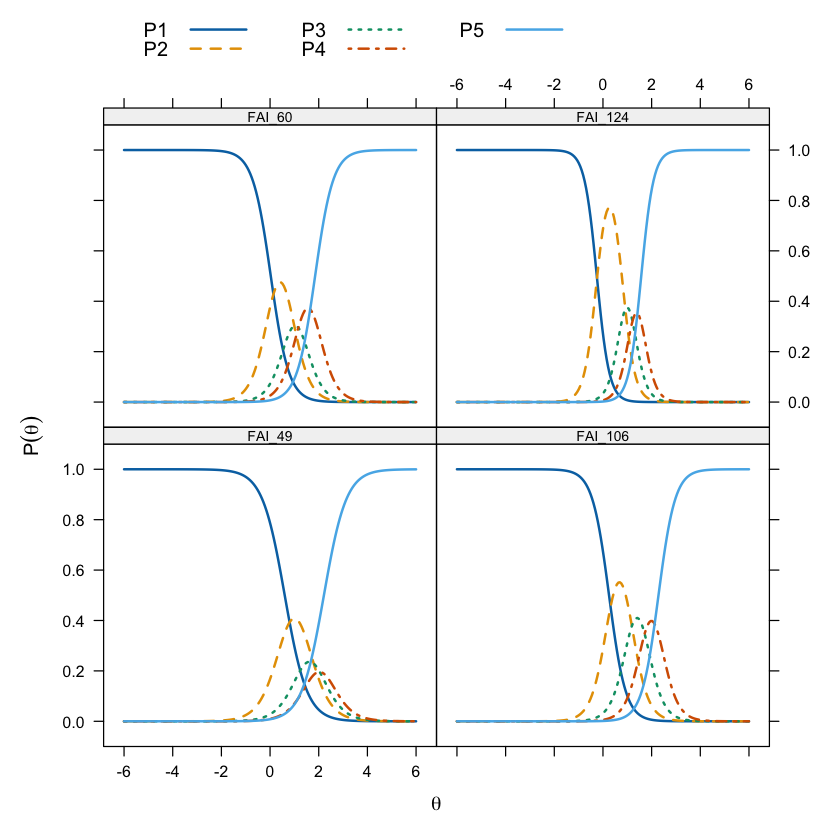

In [17]:
n_item <- length(names(good_items))
plot(
    mod,
    type = "trace",
    which.items = 1:n_item,
    main = "",
    par.settings = simpleTheme(lty = 1:4, lwd = 2),
    auto.key = list(points = FALSE, lines = TRUE, columns = 4)
)

- Grafici di Tracciamento: ogni curva rappresenta la probabilità di scegliere una specifica categoria di risposta in funzione del tratto latente. Le curve più ripide indicano una maggiore discriminazione dell'item: l'item è più sensibile nel distinguere tra soggetti con livelli leggermente diversi del tratto.

Questi grafici mostrano la quantità di informazione fornita da ciascun item a diversi livelli del tratto latente.

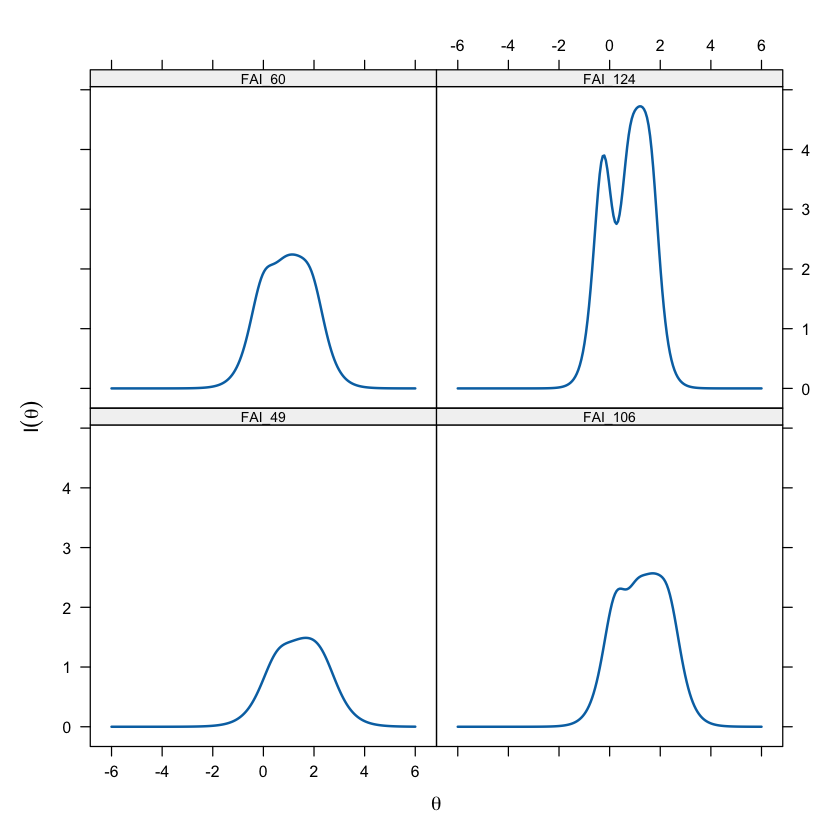

In [18]:
plot(
    mod,
    type = "infotrace",
    which.items = 1:n_item,
    main = "",
    par.settings = simpleTheme(lwd = 2)
)

- Grafici delle Funzioni di Informazione degli Item (IIF). L'altezza della curva in un dato punto indica la quantità di informazione che l'item fornisce a quel livello specifico del tratto latente. Picchi più alti indicano che un item fornisce più informazione per soggetti con quel particolare livello del tratto. La larghezza del picco indica la gamma di livelli del tratto per cui l'item è informativo. Un picco più ampio suggerisce che l'item è utile per un'ampia gamma di livelli del tratto.

In conclusione, gli item che mostrano picchi più alti e più ampi nelle loro funzioni di informazione sono particolarmente utili per la misurazione del tratto, poiché forniscono una grande quantità di informazione su un'ampia gamma di livelli del tratto.

Nel caso presente, i grafici delle Funzioni di Informazione degli Item mostrano che gli item sono adatti soprattutto per misurare rispondenti con un livello intermedio di abilità latente.

## Analisi fattoriale

In [19]:
KMO(good_items)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = good_items)
Overall MSA =  0.81
MSA for each item = 
 FAI_49 FAI_106  FAI_60 FAI_124 
   0.86    0.81    0.81    0.77 

L'indice di Kaiser-Meyer-Olkin (KMO) è una misura di idoneità dei dati per l'analisi fattoriale. Esso varia da 0 a 1, con valori più alti che indicano una maggiore idoneità dei dati per l'analisi fattoriale. Un valore KMO elevato suggerisce che le correlazioni parziali tra gli item sono basse e quindi gli item hanno abbastanza in comune per giustificare un'analisi fattoriale. 

Nel caso presente, abbiamo ottenuto `Overall MSA = 0.81`.  Questo è un valore molto buono, indicando che nel complesso, il tuo set di dati è ben adatto per l'analisi fattoriale. 

Il test di sfericità di Bartlett è un test statistico usato per verificare l'ipotesi che una matrice di correlazione sia una matrice di identità, il che implicherebbe che le variabili sono indipendenti e non correlate tra loro. Il test di Bartlett è utilizzato nell'ambito dell'analisi fattoriale per valutare se i dati sono adatti per tale analisi. 

In [20]:
cortest.bartlett(R = cor(good_items), n = nrow(good_items))

$chisq
[1] 765.8992

$p.value
[1] 3.58605e-162

$df
[1] 6

Il p-value estremamente basso indica che è altamente improbabile ottenere una statistica chi-quadro così elevata se l'ipotesi nulla fosse vera. In altre parole, è molto probabile che le variabili (item) siano correlate tra loro. Il risultato del test di Bartlett supporta l'idoneità dei dati per l'analisi fattoriale. 

La parallel analysis suggerisce una soluzione ad un fattore.

Parallel analysis suggests that the number of factors =  1  and the number of components =  1 


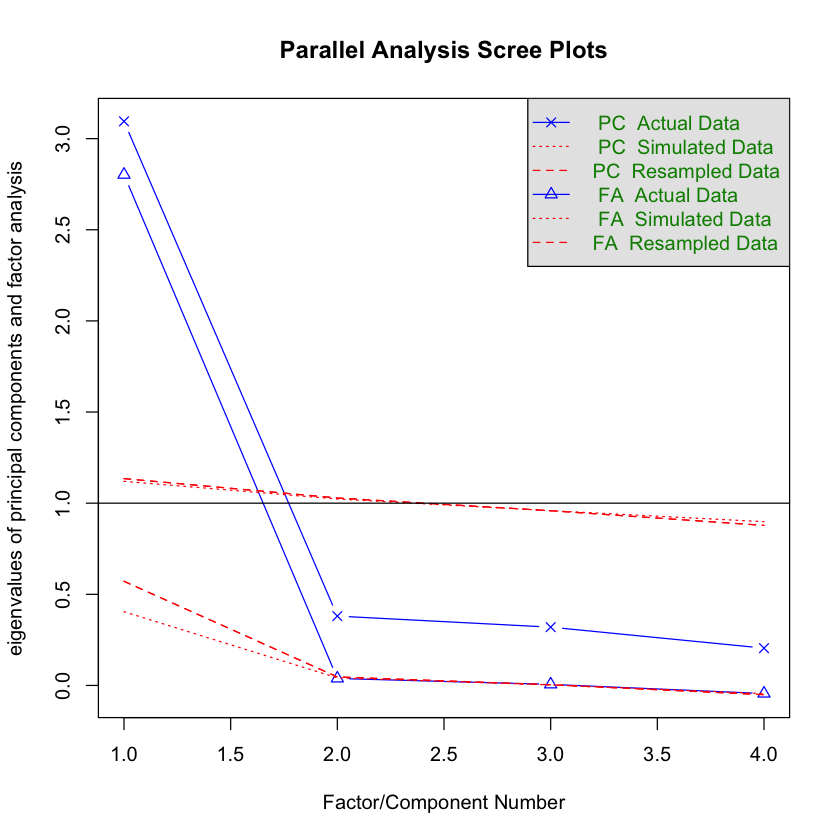

In [21]:
fa.parallel(good_items, cor = "poly")

Eseguiamo l'analisi fattoriale confermativa.

In [22]:
one_factor_model <- "
  F =~ FAI_124 + FAI_106 + FAI_60 + FAI_49
"

fit <- lavaan:::cfa(
    one_factor_model,
    data = good_items,
    ordered = names(good_items),
    std.lv = TRUE
)

# summary(fit, standardized = TRUE)
fitMeasures(
    fit, 
    c(
        "chisq", "df", "cfi", "cfi.scaled", "tli", "tli.scaled",
        "rmsea", "rmsea.scaled", "srmr"
    )
)

chisq           df          cfi   cfi.scaled          tli   tli.scaled 
       1.552        2.000        1.000        0.999        1.000        0.997 
       rmsea rmsea.scaled         srmr 
       0.000        0.054        0.014

Le misure di bontà di adattamento sono eccellenti.